### Data Dictionary
CIRCLE_ID,Telecom circle area to which the customer belongs to <br>
LOC,Local calls  within same telecom circle <br>
STD,STD calls  outside the calling circle<br>
IC,Incoming calls<br>
OG,Outgoing calls<br>
T2T,Operator T to T ie within same operator mobile to mobile<br>
T2M    ,Operator T to other operator mobile<br>
T2O    ,Operator T to other operator fixed line<br>
T2F    ,Operator T to fixed lines of T<br>
T2C    ,Operator T to its own call center<br>
ARPU    ,Average revenue per user<br>
MOU    ,Minutes of usage  voice calls<br>
AON    ,Age on network  number of days the customer is using the operator T network<br>
ONNET   ,All kind of calls within the same operator network<br>
OFFNET    ,All kind of calls outside the operator T network<br>
ROAM,Indicates that customer is in roaming zone during the call<br>
SPL   ,Special calls<br>
ISD    ,ISD calls<br>
RECH    ,Recharge<br>
NUM    ,Number<br>
AMT    ,Amount in local currency<br>
MAX    ,Maximum<br>
DATA    ,Mobile internet<br>
3G    ,G network<br>
AV    ,Average<br>
VOL    ,Mobile internet usage volume in MB<br>
2G    ,G network<br>
PCK    ,Prepaid service schemes called  PACKS<br>
NIGHT    ,Scheme to use during specific night hours only<br>
MONTHLY    ,Service schemes with validity equivalent to a month<br>
SACHET   ,Service schemes with validity smaller than a month<br>
*.6    ,KPI for the month of June<br>
*.7    ,KPI for the month of July<br>
*.8    ,KPI for the month of August<br>
FB_USER,Service scheme to avail services of Facebook and similar social networking sites<br>
VBC    ,Volume based cost  when no specific scheme is not purchased and paid as per usage

In [2688]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

In [2152]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2158]:
import xgboost as xgb

### Understanding Data Structure

In [1944]:
pd.set_option('display.max_columns',172)
pd.set_option('display.max_rows',200)

In [1945]:
data = pd.read_csv("train.csv")
data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [1946]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [1947]:
data.describe().T

count          mean           std       min         25%  \
id                  69999.0  34999.000000  20207.115084     0.000  17499.5000   
circle_id           69999.0    109.000000      0.000000   109.000    109.0000   
loc_og_t2o_mou      69297.0      0.000000      0.000000     0.000      0.0000   
std_og_t2o_mou      69297.0      0.000000      0.000000     0.000      0.0000   
loc_ic_t2o_mou      69297.0      0.000000      0.000000     0.000      0.0000   
arpu_6              69999.0    283.134365    334.213918 -2258.709     93.5810   
arpu_7              69999.0    278.185912    344.366927 -1289.715     86.7140   
arpu_8              69999.0    278.858826    351.924315  -945.808     84.0950   
onnet_mou_6         67231.0    133.153275    299.963093     0.000      7.4100   
onnet_mou_7         67312.0    133.894438    311.277193     0.000      6.6750   
onnet_mou_8         66296.0    132.978257    311.896596     0.000      6.4100   
offnet_mou_6        67231.0    198.874771    316.818355     0.000     34.8600   
offnet_mou_7        67312.0    197.153383    322.482226     0.000     32.2400   
offnet_mou_8        66296.0    196.543577    324.089234     0.000     31.5750   
roam_ic_mou_6       67231.0      9.765435     57.374429     0.000      0.0000   
roam_ic_mou_7       67312.0      7.014568     55.960985     0.000      0.0000   
roam_ic_mou_8       66296.0      7.004892     53.408135     0.000      0.0000   
roam_og_mou_6       67231.0     14.186457     73.469261     0.000      0.0000   
roam_og_mou_7       67312.0      9.842191     58.511894     0.000      0.0000   
roam_og_mou_8       66296.0      9.771783     64.618388     0.000      0.0000   
loc_og_t2t_mou_6    67231.0     46.904854    150.971758     0.000      1.6600   
loc_og_t2t_mou_7    67312.0     46.166503    154.739002     0.000      1.6500   
loc_og_t2t_mou_8    66296.0     45.686109    153.716880     0.000      1.6100   
loc_og_t2m_mou_6    67231.0     93.238231    162.046699     0.000      9.9200   
loc_og_t2m_mou_7    67312.0     90.799240    153.852597     0.000     10.0900   
loc_og_t2m_mou_8    66296.0     91.121447    152.997805     0.000      9.8300   
loc_og_t2f_mou_6    67231.0      3.743179     13.319542     0.000      0.0000   
loc_og_t2f_mou_7    67312.0      3.777031     13.568110     0.000      0.0000   
loc_og_t2f_mou_8    66296.0      3.661652     13.009193     0.000      0.0000   
loc_og_t2c_mou_6    67231.0      1.126025      5.741811     0.000      0.0000   
loc_og_t2c_mou_7    67312.0      1.361052      7.914113     0.000      0.0000   
loc_og_t2c_mou_8    66296.0      1.420840      6.542202     0.000      0.0000   
loc_og_mou_6        67231.0    143.893585    252.034597     0.000     17.2350   
loc_og_mou_7        67312.0    140.750120    246.313148     0.000     17.5900   
loc_og_mou_8        66296.0    140.476486    245.342359     0.000     17.2375   
std_og_t2t_mou_6    67231.0     80.619382    255.098355     0.000      0.0000   
std_og_t2t_mou_7    67312.0     83.775851    266.693254     0.000      0.0000   
std_og_t2t_mou_8    66296.0     83.471486    267.021929     0.000      0.0000   
std_og_t2m_mou_6    67231.0     88.152110    255.771554     0.000      0.0000   
std_og_t2m_mou_7    67312.0     91.538615    267.532089     0.000      0.0000   
std_og_t2m_mou_8    66296.0     90.586999    270.032002     0.000      0.0000   
std_og_t2f_mou_6    67231.0      1.126377      8.136645     0.000      0.0000   
std_og_t2f_mou_7    67312.0      1.084062      8.325206     0.000      0.0000   
std_og_t2f_mou_8    66296.0      1.057739      7.696853     0.000      0.0000   
std_og_t2c_mou_6    67231.0      0.000000      0.000000     0.000      0.0000   
std_og_t2c_mou_7    67312.0      0.000000      0.000000     0.000      0.0000   
std_og_t2c_mou_8    66296.0      0.000000      0.000000     0.000      0.0000   
std_og_mou_6        67231.0    169.900601    392.046600     0.000      0.0000   
std_og_mou_7        67312.0    176.401217    409.2995

In [1948]:
data.select_dtypes(include = 'float')

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7  \
0                 0.0             0.0             0.0   31.277   87.009   
1                 0.0             0.0             0.0    0.000  122.787   
2                 0.0             0.0             0.0   60.806  103.176   
3                 0.0             0.0             0.0  156.362  205.260   
4                 0.0             0.0             0.0  240.708  128.191   
...               ...             ...             ...      ...      ...   
69994             0.0             0.0             0.0   15.760  410.924   
69995             0.0             0.0             0.0  160.083  289.129   
69996             0.0             0.0             0.0  372.088  258.374   
69997             0.0             0.0             0.0  238.575  245.414   
69998             0.0             0.0             0.0  168.269   42.815   

        arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0        7.527        48.58       124.38         1.29         32.24   
1       42.953         0.00         0.00         0.00          0.00   
2        0.000         0.53        15.93         0.00         53.99   
3      111.095         7.26        16.01         0.00         68.76   
4      101.565        21.28         4.83         6.13         56.99   
...        ...          ...          ...          ...           ...   
69994  329.136         0.00         7.36        10.93          0.00   
69995  265.772       116.54       196.46       232.63         49.53   
69996  279.782        77.13        68.44        78.44        335.54   
69997  145.062        14.01         7.64         6.71         30.34   
69998  167.961         0.00         0.00         0.00          0.00   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0             96.68          2.33           0.00            0.0   
1             25.99         30.89           0.00            0.0   
2             82.05          0.00           0.00            0.0   
3             78.48         50.23           0.00            0.0   
4             38.11          9.63          53.64            0.0   
...             ...           ...            ...            ...   
69994        488.46        381.64          14.96            0.0   
69995         96.28         48.06           0.00            0.0   
69996        227.94        263.84           0.00            0.0   
69997         16.68         12.56          25.06            0.0   
69998          0.00          0.00           0.00            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0                0.0           0.00            0.0           0.00   
1                0.0           0.00            0.0           0.00   
2                0.0           0.00            0.0           0.00   
3                0.0           0.00            0.0           1.63   
4                0.0          15.73            0.0           0.00   
...              ...            ...            ...            ...   
69994            0.0           0.00            0.0           0.00   
69995            0.0           0.00            0.0           0.00   
69996            0.0           0.00            0.0           0.00   
69997            0.0           4.58            0.0           0.00   
69998            0.0           0.00            0.0           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                  2.23              0.00              0.28              5.29   
1                  0.00              0.00              0.00              0.00   
2                  0.53             12.98              0.00             24.11   
3                  6.99              3.94              0.00             37.91   
4                 10.16              4.83              6.13             36.74   
...                 ...               ...               ...               ...   
69994              0.00              2.44           

In [1949]:
data.select_dtypes(include = 'int64')

id  circle_id  total_rech_num_6  total_rech_num_7  total_rech_num_8  \
0          0        109                 3                 2                 2   
1          1        109                 3                 4                 5   
2          2        109                 2                 4                 2   
3          3        109                 2                 4                 3   
4          4        109                13                10                 8   
...      ...        ...               ...               ...               ...   
69994  69994        109                 1                17                13   
69995  69995        109                 5                11                 9   
69996  69996        109                 3                 1                 4   
69997  69997        109                 5                 3                 2   
69998  69998        109                 2                 2                 2   

       total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
0                    77                65                10              65   
1                     0               145                50               0   
2                    70               120                 0              70   
3                   160               240               130             110   
4                   290               136               122              50   
...                 ...               ...               ...             ...   
69994                50               397               512              50   
69995               200               313               308              90   
69996               626               250               397             279   
69997               379               252               145             200   
69998               198                50               198             198   

       max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
0                  65              10                  65                  65   
1                 145              50                   0                   0   
2                  70               0                  70                  50   
3                 110              50                 110                 110   
4                  41              30                  25                  10   
...               ...             ...                 ...                 ...   
69994             110             130                  50                  20   
69995              44              44                  50                  30   
69996             250             349                 279                 250   
69997             252             145                   0                   0   
69998              50             198                 198                   0   

       last_day_rch_amt_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  \
0                       0             0             0             0   
1                       0             0             0             0   
2                       0             0             0             0   
3                      50             0             0             0   
4                      30             0             0             0   
...                   ...           ...           ...           ...   
69994                 130             0             0             0   
69995                  42             0             0             0   
69996                  48             0             0             0   
69997                   0             0             0             0   
69998                   0             1             0             1   

       sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  \
0                0            0            0             0             0   
1                0            0            0             0             1   
2                0            0   

In [1950]:
data.select_dtypes(include = 'object')

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0                6/30/2014            7/31/2014            8/31/2014   
1                6/30/2014            7/31/2014            8/31/2014   
2                6/30/2014            7/31/2014            8/31/2014   
3                6/30/2014            7/31/2014            8/31/2014   
4                6/30/2014            7/31/2014            8/31/2014   
...                    ...                  ...                  ...   
69994            6/30/2014            7/31/2014            8/31/2014   
69995            6/30/2014            7/31/2014            8/31/2014   
69996            6/30/2014            7/31/2014            8/31/2014   
69997            6/30/2014            7/31/2014            8/31/2014   
69998            6/30/2014            7/31/2014            8/31/2014   

      date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0               6/22/2014           7/10/2014           8/24/2014   
1               6/12/2014           7/10/2014           8/26/2014   
2               6/11/2014           7/22/2014           8/24/2014   
3               6/15/2014           7/21/2014           8/25/2014   
4               6/25/2014           7/26/2014           8/30/2014   
...                   ...                 ...                 ...   
69994           6/18/2014           7/31/2014           8/31/2014   
69995           6/28/2014           7/31/2014           8/27/2014   
69996           6/25/2014           7/30/2014           8/29/2014   
69997           6/29/2014           7/19/2014           8/26/2014   
69998           6/19/2014           7/27/2014           8/25/2014   

      date_of_last_rech_data_6 date_of_last_rech_data_7  \
0                          NaN                      NaN   
1                          NaN                 7/8/2014   
2                          NaN                      NaN   
3                          NaN                      NaN   
4                    6/25/2014                7/23/2014   
...                        ...                      ...   
69994                      NaN                7/31/2014   
69995                      NaN                      NaN   
69996                      NaN                      NaN   
69997                6/17/2014                7/13/2014   
69998                6/19/2014                      NaN   

      date_of_last_rech_data_8  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                    8/20/2014  
...                        ...  
69994                8/21/2014  
69995                      NaN  
69996                      NaN  
69997                8/14/2014  
69998                 8/8/2014  

[69999 rows x 9 columns]

### Data Pre-Processing

#### 1. Checking for Missing values

In [1951]:
round(((data.isnull().sum()/len(data))* 100),2)

id                           0.00
circle_id                    0.00
loc_og_t2o_mou               1.00
std_og_t2o_mou               1.00
loc_ic_t2o_mou               1.00
last_date_of_month_6         0.00
last_date_of_month_7         0.57
last_date_of_month_8         1.05
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  3.95
onnet_mou_7                  3.84
onnet_mou_8                  5.29
offnet_mou_6                 3.95
offnet_mou_7                 3.84
offnet_mou_8                 5.29
roam_ic_mou_6                3.95
roam_ic_mou_7                3.84
roam_ic_mou_8                5.29
roam_og_mou_6                3.95
roam_og_mou_7                3.84
roam_og_mou_8                5.29
loc_og_t2t_mou_6             3.95
loc_og_t2t_mou_7             3.84
loc_og_t2t_mou_8             5.29
loc_og_t2m_mou_6             3.95
loc_og_t2m_mou_7             3.84
loc_og_t2m_mou_8             5.29
loc_og_t2f_mou

Following columns can be removed:
1. Columns with very high percentage of missing values
2. circle_id - It has a single value (109)
3. id
4. last_date_of_month for all three months
5. Columns with all 0s

In [1952]:
col = list(data.columns)
col

['id',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 

In [1953]:
data.drop(columns = ['circle_id', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8','arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8','fb_user_6',
 'fb_user_7',
 'fb_user_8'], inplace = True)

In [1954]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 141 entries, id to churn_probability
dtypes: float64(108), int64(27), object(6)
memory usage: 75.3+ MB


In [1955]:
round(((data.isnull().sum()/len(data))* 100),2)

id                      0.00
loc_og_t2o_mou          1.00
std_og_t2o_mou          1.00
loc_ic_t2o_mou          1.00
last_date_of_month_6    0.00
last_date_of_month_7    0.57
last_date_of_month_8    1.05
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
onnet_mou_6             3.95
onnet_mou_7             3.84
onnet_mou_8             5.29
offnet_mou_6            3.95
offnet_mou_7            3.84
offnet_mou_8            5.29
roam_ic_mou_6           3.95
roam_ic_mou_7           3.84
roam_ic_mou_8           5.29
roam_og_mou_6           3.95
roam_og_mou_7           3.84
roam_og_mou_8           5.29
loc_og_t2t_mou_6        3.95
loc_og_t2t_mou_7        3.84
loc_og_t2t_mou_8        5.29
loc_og_t2m_mou_6        3.95
loc_og_t2m_mou_7        3.84
loc_og_t2m_mou_8        5.29
loc_og_t2f_mou_6        3.95
loc_og_t2f_mou_7        3.84
loc_og_t2f_mou_8        5.29
loc_og_t2c_mou_6        3.95
loc_og_t2c_mou_7        3.84
loc_og_t2c_mou_8        5.29
loc_og_mou_6  

In [1956]:
# Missing values in last_day_of_month columns replaced by mode value
data['last_date_of_month_7'].fillna(value = 7/31/2014,inplace=True)
data['last_date_of_month_8'].fillna(value = 8/31/2014,inplace=True)

In [1957]:
# Missing values in last_day_of_rech columns replaced by last_day_of_month
data['date_of_last_rech_6'].fillna(value = data['last_date_of_month_6'],inplace=True)
data['date_of_last_rech_7'].fillna(value = data['last_date_of_month_7'],inplace=True)
data['date_of_last_rech_8'].fillna(value = data['last_date_of_month_8'],inplace=True)

In [1958]:
# Saving date values for using with test data
last_date_6 = data['last_date_of_month_6']
last_date_7 = data['last_date_of_month_6']
last_date_8 = data['last_date_of_month_6']

In [1959]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 141 entries, id to churn_probability
dtypes: float64(108), int64(27), object(6)
memory usage: 75.3+ MB


In [1960]:
round(((data.isnull().sum()/len(data))* 100),2)

id                      0.00
loc_og_t2o_mou          1.00
std_og_t2o_mou          1.00
loc_ic_t2o_mou          1.00
last_date_of_month_6    0.00
last_date_of_month_7    0.00
last_date_of_month_8    0.00
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
onnet_mou_6             3.95
onnet_mou_7             3.84
onnet_mou_8             5.29
offnet_mou_6            3.95
offnet_mou_7            3.84
offnet_mou_8            5.29
roam_ic_mou_6           3.95
roam_ic_mou_7           3.84
roam_ic_mou_8           5.29
roam_og_mou_6           3.95
roam_og_mou_7           3.84
roam_og_mou_8           5.29
loc_og_t2t_mou_6        3.95
loc_og_t2t_mou_7        3.84
loc_og_t2t_mou_8        5.29
loc_og_t2m_mou_6        3.95
loc_og_t2m_mou_7        3.84
loc_og_t2m_mou_8        5.29
loc_og_t2f_mou_6        3.95
loc_og_t2f_mou_7        3.84
loc_og_t2f_mou_8        5.29
loc_og_t2c_mou_6        3.95
loc_og_t2c_mou_7        3.84
loc_og_t2c_mou_8        5.29
loc_og_mou_6  

In [1961]:
# Imputing missing values for remaining columns
num_col = data.select_dtypes(include = ['float64','int64'])
for var in num_col.columns:
    if round(((data[var].isnull().sum()/len(data))* 100),2) < 6.00:
        data[var].fillna(value = data[var].median(),inplace =True)

In [1962]:
# Saving median values for using with test data
data_median = {}
for var in num_col.columns:
    data_median[var] = data[var].median()
data_median

{'id': 34999.0,
 'loc_og_t2o_mou': 0.0,
 'std_og_t2o_mou': 0.0,
 'loc_ic_t2o_mou': 0.0,
 'arpu_6': 197.484,
 'arpu_7': 191.588,
 'arpu_8': 192.234,
 'onnet_mou_6': 34.11,
 'onnet_mou_7': 32.28,
 'onnet_mou_8': 32.1,
 'offnet_mou_6': 96.48,
 'offnet_mou_7': 91.88499999999999,
 'offnet_mou_8': 91.80000000000001,
 'roam_ic_mou_6': 0.0,
 'roam_ic_mou_7': 0.0,
 'roam_ic_mou_8': 0.0,
 'roam_og_mou_6': 0.0,
 'roam_og_mou_7': 0.0,
 'roam_og_mou_8': 0.0,
 'loc_og_t2t_mou_6': 11.91,
 'loc_og_t2t_mou_7': 11.58,
 'loc_og_t2t_mou_8': 11.74,
 'loc_og_t2m_mou_6': 41.03,
 'loc_og_t2m_mou_7': 40.17,
 'loc_og_t2m_mou_8': 40.35,
 'loc_og_t2f_mou_6': 0.0,
 'loc_og_t2f_mou_7': 0.0,
 'loc_og_t2f_mou_8': 0.0,
 'loc_og_t2c_mou_6': 0.0,
 'loc_og_t2c_mou_7': 0.0,
 'loc_og_t2c_mou_8': 0.0,
 'loc_og_mou_6': 65.19,
 'loc_og_mou_7': 63.43,
 'loc_og_mou_8': 63.519999999999996,
 'std_og_t2t_mou_6': 0.0,
 'std_og_t2t_mou_7': 0.0,
 'std_og_t2t_mou_8': 0.0,
 'std_og_t2m_mou_6': 3.98,
 'std_og_t2m_mou_7': 3.71,
 'std_og_

In [1963]:
round(((data.isnull().sum()/len(data))* 100),2)

id                      0.0
loc_og_t2o_mou          0.0
std_og_t2o_mou          0.0
loc_ic_t2o_mou          0.0
last_date_of_month_6    0.0
last_date_of_month_7    0.0
last_date_of_month_8    0.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
roam_ic_mou_6           0.0
roam_ic_mou_7           0.0
roam_ic_mou_8           0.0
roam_og_mou_6           0.0
roam_og_mou_7           0.0
roam_og_mou_8           0.0
loc_og_t2t_mou_6        0.0
loc_og_t2t_mou_7        0.0
loc_og_t2t_mou_8        0.0
loc_og_t2m_mou_6        0.0
loc_og_t2m_mou_7        0.0
loc_og_t2m_mou_8        0.0
loc_og_t2f_mou_6        0.0
loc_og_t2f_mou_7        0.0
loc_og_t2f_mou_8        0.0
loc_og_t2c_mou_6        0.0
loc_og_t2c_mou_7        0.0
loc_og_t2c_mou_8        0.0
loc_og_mou_6            0.0
loc_og_mou_7        

In [1964]:
# Removing columns with all 0's
data.drop (columns = ['loc_og_t2o_mou','std_og_t2o_mou',
 'loc_ic_t2o_mou','std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8','std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8'], axis=1, inplace =True)

In [1965]:
# Saving ids for later use and dropping the id column
id = pd.Series(data['id'])
data.drop(columns = ['id'], axis =1, inplace =True)

In [1966]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 131 entries, last_date_of_month_6 to churn_probability
dtypes: float64(99), int64(26), object(6)
memory usage: 70.0+ MB


In [1967]:
data.head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              1.01             18.75             80.61               0.0   
1              0.00              0.00              0.00               0.0   
2              0.00             28.94             82.05               0.0   
3              0.00             15.33             25.93               4.6   
4              0.00              4.35  

#### 2. Extracting gap between last recharge for every month

In [1968]:
data['last_rech_gap1'] = pd.to_datetime(data['date_of_last_rech_7']) - pd.to_datetime(data['date_of_last_rech_6'])
data['last_rech_gap2'] = pd.to_datetime(data['date_of_last_rech_8']) - pd.to_datetime(data['date_of_last_rech_7'])

In [1969]:
data['last_rech_gap1'] = (data['last_rech_gap1'].astype('str'))
data['last_rech_gap1'] = data['last_rech_gap1'].apply(lambda x : x[0:2])
data['last_rech_gap1'] = pd.to_numeric(data['last_rech_gap1'])
data['last_rech_gap1']

0        18
1        28
2        41
3        36
4        31
         ..
69994    43
69995    33
69996    35
69997    20
69998    38
Name: last_rech_gap1, Length: 69999, dtype: int64

In [1970]:
data['last_rech_gap2'] = (data['last_rech_gap2'].astype('str'))
data['last_rech_gap2'] = data['last_rech_gap2'].apply(lambda x : x[0:2])
data['last_rech_gap2'] = pd.to_numeric(data['last_rech_gap2'])
data['last_rech_gap2']

0        45
1        47
2        33
3        35
4        35
         ..
69994    31
69995    27
69996    30
69997    38
69998    29
Name: last_rech_gap2, Length: 69999, dtype: int64

In [1971]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 133 entries, last_date_of_month_6 to last_rech_gap2
dtypes: float64(99), int64(28), object(6)
memory usage: 71.0+ MB


In [1972]:
data.head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              1.01             18.75             80.61               0.0   
1              0.00              0.00              0.00               0.0   
2              0.00             28.94             82.05               0.0   
3              0.00             15.33             25.93               4.6   
4              0.00              4.35  

In [1973]:
# Removing date_of_last_rech and last_day_of_month columns
data.drop(columns = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8'],axis = 1, inplace =True)

In [1974]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 127 entries, arpu_6 to last_rech_gap2
dtypes: float64(99), int64(28)
memory usage: 67.8 MB


In [1975]:
data.reset_index(drop = True, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 127 entries, arpu_6 to last_rech_gap2
dtypes: float64(99), int64(28)
memory usage: 67.8 MB


#### 3. Generating new features to capture the change in usage over three months

In [1976]:
data.corr()['churn_probability'].sort_values(ascending = False)

churn_probability     1.000000
std_og_mou_6          0.088728
std_og_t2t_mou_6      0.069426
roam_og_mou_7         0.068077
std_og_t2m_mou_6      0.066679
roam_og_mou_8         0.058426
roam_ic_mou_7         0.053837
roam_og_mou_6         0.051263
roam_ic_mou_8         0.050802
onnet_mou_6           0.047915
roam_ic_mou_6         0.039684
total_og_mou_6        0.033225
offnet_mou_6          0.028187
total_rech_num_6      0.025966
arpu_6                0.025351
total_rech_amt_6      0.018869
std_og_mou_7          0.012667
std_og_t2t_mou_7      0.011363
std_ic_t2t_mou_6      0.010817
og_others_6           0.008159
std_ic_mou_6          0.007612
std_og_t2m_mou_7      0.007148
spl_og_mou_6          0.007075
isd_og_mou_6          0.006878
std_ic_t2m_mou_6      0.005695
isd_ic_mou_6          0.001423
isd_og_mou_7          0.001094
loc_og_t2c_mou_7      0.000823
loc_og_t2c_mou_6     -0.000555
sachet_3g_6          -0.000936
og_others_7          -0.002570
isd_og_mou_8         -0.003227
og_other

Correlations of most of the variables with churn probability are quite low. It would make more sense to capture change in usage over three months instead of using data for separate months.<br> Assuming first two months are good for the customer and any indications for churn would appear in the third month.

In [1977]:
data['arpu'] = (data['arpu_6'] + data['arpu_7'])/2 - data[ 'arpu_8']
data['onnet_mou'] = (data['onnet_mou_6'] + data['onnet_mou_7'])/2 - data[ 'onnet_mou_8']
data['offnet_mou'] = (data['offnet_mou_6']+data['offnet_mou_7'])/2 - data['offnet_mou_8']
data['roam_ic_mou'] = (data['roam_ic_mou_6']+data['roam_ic_mou_7'])/2 - data['roam_ic_mou_8']
data['roam_og_mou'] = (data['roam_og_mou_6']+data['roam_og_mou_7'])/2 - data['roam_og_mou_8']
data['loc_og_t2t_mou'] = (data['loc_og_t2t_mou_6'] + data['loc_og_t2t_mou_7'])/2 - data['loc_og_t2t_mou_8']
data['loc_og_t2m_mou'] = (data['loc_og_t2m_mou_6'] + data['loc_og_t2m_mou_7'])/2 - data['loc_og_t2m_mou_8']
data['loc_og_t2f_mou'] = (data['loc_og_t2f_mou_6'] + data['loc_og_t2f_mou_7'])/2 - data['loc_og_t2f_mou_8']
data['loc_og_t2c_mou'] = (data['loc_og_t2c_mou_6'] + data['loc_og_t2c_mou_7'])/2 - data['loc_og_t2c_mou_8']
#data['loc_og_mou'] = (data['loc_og_mou_6'] + data['loc_og_mou_7'])/2 - data['loc_og_mou_8']
data['std_og_t2t_mou'] = (data['std_og_t2t_mou_6'] + data['std_og_t2t_mou_7'])/2 - data['std_og_t2t_mou_8']
data['std_og_t2m_mou'] = (data['std_og_t2m_mou_6'] + data['std_og_t2m_mou_7'])/2 - data['std_og_t2m_mou_8']
data['std_og_t2f_mou'] = (data['std_og_t2f_mou_6'] + data['std_og_t2f_mou_7'])/2 - data['std_og_t2f_mou_8']
#data['std_og_mou'] = (data['std_og_mou_6'] + data['std_og_mou_7'])/2 - data['std_og_mou_8']
data['isd_og_mou'] = (data['isd_og_mou_6'] + data['isd_og_mou_7'])/2 - data['isd_og_mou_8']
data['spl_og_mou'] = (data['spl_og_mou_6'] + data['spl_og_mou_7'])/2 - data['spl_og_mou_8']
data['og_others'] = (data['og_others_6'] + data['og_others_7'])/2 - data['og_others_8']
#data['total_og_mou'] = (data['total_og_mou_6'] + data['total_og_mou_7'])/2 - data['total_og_mou_8']
data['loc_ic_t2t_mou'] = (data['loc_ic_t2t_mou_6'] + data['loc_ic_t2t_mou_7'])/2 - data['loc_ic_t2t_mou_8']
data['loc_ic_t2m_mou'] = (data['loc_ic_t2m_mou_6'] + data['loc_ic_t2m_mou_7'])/2 - data['loc_ic_t2m_mou_8']
data['loc_ic_t2f_mou'] = (data['loc_ic_t2f_mou_6'] + data['loc_ic_t2f_mou_7'])/2 - data['loc_ic_t2f_mou_8']
#data['loc_ic_mou'] = (data['loc_ic_mou_6'] + data['loc_ic_mou_7'])/2 - data['loc_ic_mou_8']
data['std_ic_t2t_mou'] = (data['std_ic_t2t_mou_6'] + data['std_ic_t2t_mou_7'])/2 - data['std_ic_t2t_mou_8']
data['std_ic_t2m_mou'] = (data['std_ic_t2m_mou_6'] + data['std_ic_t2m_mou_7'])/2 - data['std_ic_t2m_mou_8']
data['std_ic_t2f_mou'] = (data['std_ic_t2f_mou_6'] + data['std_ic_t2f_mou_7'])/2 - data['std_ic_t2f_mou_8']
#data['std_ic_mou'] = (data['std_ic_mou_6'] + data['std_ic_mou_7'])/2 - data['std_ic_mou_8']
data['isd_ic_mou'] = (data['isd_ic_mou_6'] + data['isd_ic_mou_7'])/2 - data['isd_ic_mou_8']
data['spl_ic_mou'] = (data['spl_ic_mou_6'] + data['spl_ic_mou_7'])/2 - data['spl_ic_mou_8']
data['ic_others'] = (data['ic_others_6'] + data['ic_others_7'])/2 - data['ic_others_8']
#data['total_ic_mou'] = (data['total_ic_mou_6'] + data['total_ic_mou_7'])/2 - data['total_ic_mou_8']
data['last_day_rch_amt'] = (data['last_day_rch_amt_6'] + data['last_day_rch_amt_7'])/2 - data['last_day_rch_amt_8']
data['vol_2g_mb'] = (data['vol_2g_mb_6']+data['vol_2g_mb_7'])/2 -data['vol_2g_mb_8']
data['vol_3g_mb'] = (data['vol_3g_mb_6']+data['vol_3g_mb_7'])/2 -data['vol_3g_mb_8']
data['monthly_2g'] = (data['monthly_2g_6']+data['monthly_2g_7'])/2 -data['monthly_2g_8']
data['monthly_3g'] = (data['monthly_3g_6']+data['monthly_3g_7'])/2 -data['monthly_3g_8']
data['sachet_2g'] = (data['sachet_2g_6']+data['sachet_2g_7'])/2 -data['sachet_2g_8']
data['sachet_3g'] = (data['sachet_3g_6']+data['sachet_3g_7'])/2 -data['sachet_3g_8']
data['vbc_3g'] = (data['jun_vbc_3g']+data['jul_vbc_3g'])/2 - data['aug_vbc_3g']
data['max_rech_amt'] = (data['max_rech_amt_6'] + data['max_rech_amt_7'])/2 - data['max_rech_amt_8']
data['total_rech_amt'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2 - data['total_rech_amt_8']
data['total_rech_num'] = (data['total_rech_num_6'] + data['total_rech_num_7'])/2 - data['total_rech_num_8']

In [1978]:
# Dropping the original columns and the columns relating to total mou values, as we are considering their individual components
data.drop(columns = ['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8','aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g'], axis=1, inplace =True)

In [1979]:
data.head()

aon  churn_probability  last_rech_gap1  last_rech_gap2       arpu  \
0    1958                  0              18              45    51.6160   
1     710                  0              28              47    18.4405   
2     882                  0              41              33    81.9910   
3     982                  0              36              35    69.7160   
4     647                  0              31              35    82.8845   
5     698                  0              27              32    -3.6900   
6    1083                  0              20              38    68.2655   
7     584                  0              32              37    -0.0010   
8    2455                  1              32              20    75.1740   
9    2530                  0              19              43   114.9385   
10    468                  0              23              14   207.3780   
11    648                  0              33              27  -157.4945   
12    322                  0              31              31    26.9085   
13   2613                  0              26              39    34.3895   
14   1049                  0              22              36    81.0515   
15    602                  0              28              36   140.6355   
16   1103                  0              41              28   -19.3550   
17   1297                  0              36              34    48.4845   
18    504                  0              38              26    22.5355   
19    673                  0              29              34    -4.1340   
20   2405                  0              26              33   -16.3410   
21   1511                  0              29              21    81.3680   
22   2837                  0              31              27    48.6470   
23    455                  0              31              22   538.4650   
24   1219                  0              31              36   121.5725   
25   2831                  0              37              32  -347.2460   
26   1276                  0              45              32   -86.3980   
27    573                  0              21              34   -50.5630   
28    232                  0              19              40    33.4530   
29   3038                  0              36              24  -165.7630   
30    327                  0              39              26  -115.4520   
31    303                  1              56              31   254.7535   
32    517                  0              29              18   132.1165   
33    457                  1              49              35     5.2575   
34   1389                  0              29              29    63.0380   
35    399                  0              22              41    36.9120   
36    207                  0              36              18     7.4685   
37    482                  0              41              16   189.1635   
38    641                  0              49              23    84.2510   
39    622                  0              30              32  -485.8050   
40    771                  0              30              33  -102.1790   
41    194                  1              31              29    92.6960   
42    400                  0              29              35  -190.3075   
43    263                  0              31              29  -145.6290   
44    506                  0              31              31   -96.2645   
45    942                  0              30              23   192.8030   
46   2307                  0              28              26    60.5150   
47    407                  0              38              31   -17.6965   
48   2754                  0              25              19    31.8160   
49    255                  0              31              30   -17.5870   
50   2826                  0              26              33     8.5290   
51   2452                  0              27               9     6.7325   
52    826                  0   

In [1980]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   aon                69999 non-null  int64  
 1   churn_probability  69999 non-null  int64  
 2   last_rech_gap1     69999 non-null  int64  
 3   last_rech_gap2     69999 non-null  int64  
 4   arpu               69999 non-null  float64
 5   onnet_mou          69999 non-null  float64
 6   offnet_mou         69999 non-null  float64
 7   roam_ic_mou        69999 non-null  float64
 8   roam_og_mou        69999 non-null  float64
 9   loc_og_t2t_mou     69999 non-null  float64
 10  loc_og_t2m_mou     69999 non-null  float64
 11  loc_og_t2f_mou     69999 non-null  float64
 12  loc_og_t2c_mou     69999 non-null  float64
 13  std_og_t2t_mou     69999 non-null  float64
 14  std_og_t2m_mou     69999 non-null  float64
 15  std_og_t2f_mou     69999 non-null  float64
 16  isd_og_mou         699

#### 4. Checking for outliers

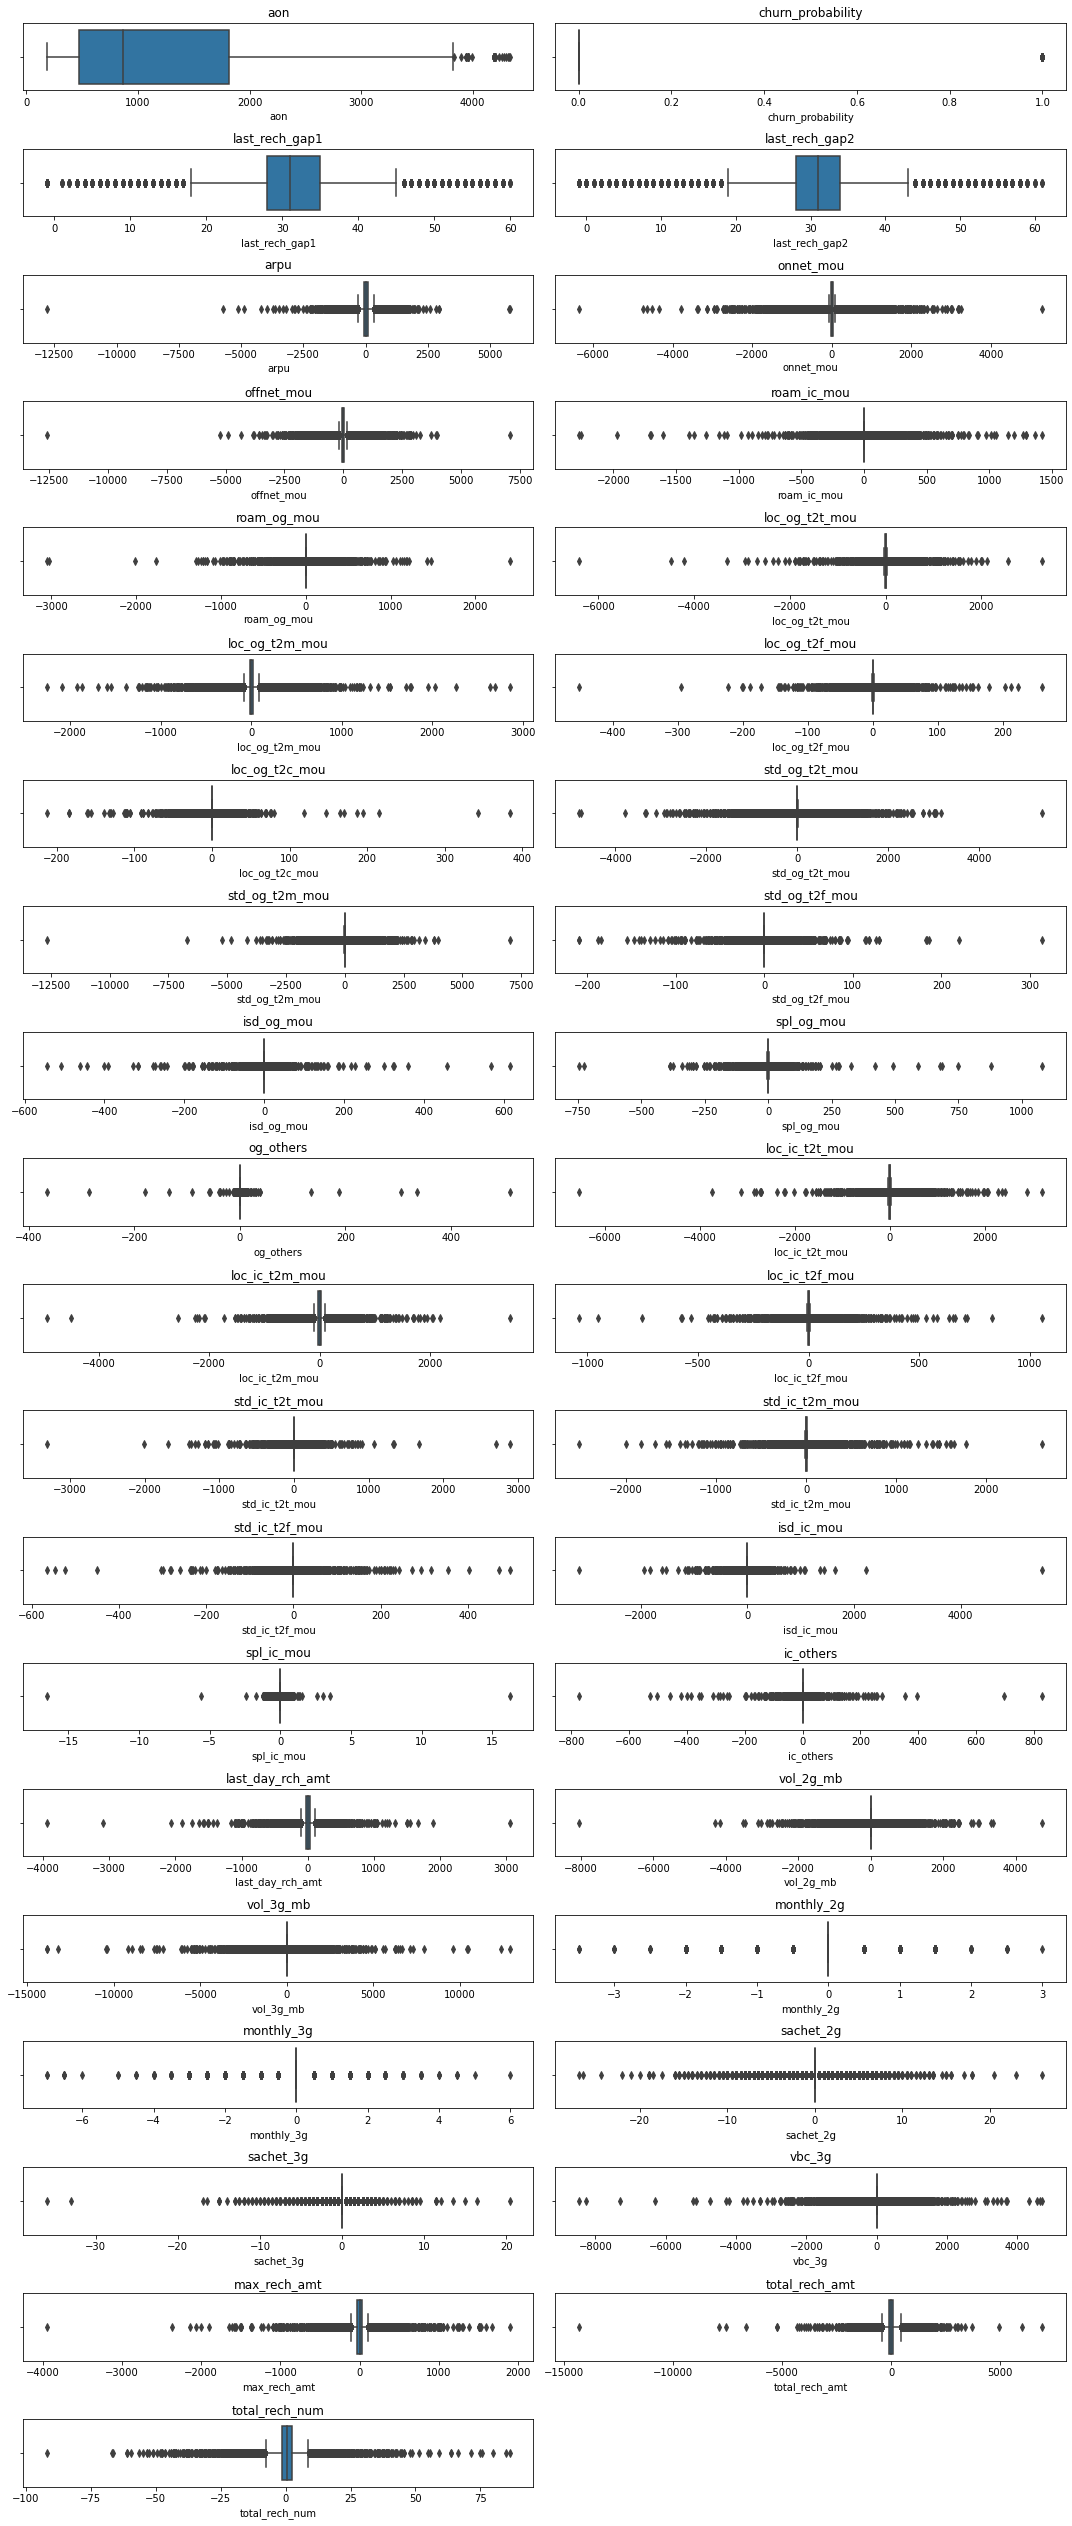

In [1981]:
a = 23
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 40)

for var in data:
    plt.subplot(a, b, c)
    plt.title(var)
    plt.xlabel(var)
    sns.boxplot(data[var])
    c = c + 1
    plt.tight_layout()
plt.show();

In [1982]:
# Treating the outliers
for var in data.columns:
    Q1 = np.quantile(data[var],0.01)
    Q3 = np.quantile(data[var],0.99)
    data[var] = np.where(data[var]<Q1,Q1,data[var]) 
    data[var] = np.where(data[var]>Q3,Q3,data[var])

In [1983]:
# Saving quantile limits for using with test data
Q1 = {}
for var in data.columns:
    Q1[var] = np.quantile(data[var],0.01)
Q1

{'aon': 188.0,
 'churn_probability': 0.0,
 'last_rech_gap1': 8.0,
 'last_rech_gap2': 0.0,
 'arpu': -662.5840755999999,
 'onnet_mou': -656.785256,
 'offnet_mou': -689.6701340000001,
 'roam_ic_mou': -92.590008,
 'roam_og_mou': -131.59511200000003,
 'loc_og_t2t_mou': -164.35011599999999,
 'loc_og_t2m_mou': -261.98004000000003,
 'loc_og_t2f_mou': -23.130001999999998,
 'loc_og_t2c_mou': -18.66001,
 'std_og_t2t_mou': -596.6700379999999,
 'std_og_t2m_mou': -605.600704,
 'std_og_t2f_mou': -12.260019999999999,
 'isd_og_mou': -2.6,
 'spl_og_mou': -41.840006,
 'og_others': 0.0,
 'loc_ic_t2t_mou': -164.50500399999999,
 'loc_ic_t2m_mou': -290.42000599999994,
 'loc_ic_t2f_mou': -59.87501,
 'std_ic_t2t_mou': -71.85506399999998,
 'std_ic_t2m_mou': -121.040046,
 'std_ic_t2f_mou': -20.615005999999997,
 'isd_ic_mou': -72.610008,
 'spl_ic_mou': -0.59,
 'ic_others': -10.955002,
 'last_day_rch_amt': -275.0,
 'vol_2g_mb': -581.325358,
 'vol_3g_mb': -1246.900944,
 'monthly_2g': -1.0,
 'monthly_3g': -1.0,
 'sa

In [1984]:
Q3 = {}
for var in data.columns:
    Q3[var] = np.quantile(data[var],0.99)
Q3

{'aon': 3651.0,
 'churn_probability': 1.0,
 'last_rech_gap1': 50.0,
 'last_rech_gap2': 51.0,
 'arpu': 634.7685898000001,
 'onnet_mou': 642.8500300000001,
 'offnet_mou': 681.905002,
 'roam_ic_mou': 111.98000400000001,
 'roam_og_mou': 153.180024,
 'loc_og_t2t_mou': 186.270032,
 'loc_og_t2m_mou': 269.50008800000006,
 'loc_og_t2f_mou': 22.11001600000001,
 'loc_og_t2c_mou': 12.680004000000002,
 'std_og_t2t_mou': 564.5851540000001,
 'std_og_t2m_mou': 583.4203960000002,
 'std_og_t2f_mou': 12.315002,
 'isd_og_mou': 4.14,
 'spl_og_mou': 29.885004000000002,
 'og_others': 3.43,
 'loc_ic_t2t_mou': 171.50004800000002,
 'loc_ic_t2m_mou': 276.38007200000004,
 'loc_ic_t2f_mou': 64.080016,
 'std_ic_t2t_mou': 63.32002800000002,
 'std_ic_t2m_mou': 116.77502000000001,
 'std_ic_t2f_mou': 19.840006000000002,
 'isd_ic_mou': 61.71000400000001,
 'spl_ic_mou': 0.44,
 'ic_others': 10.065002,
 'last_day_rch_amt': 250.0,
 'vol_2g_mb': 526.1006720000003,
 'vol_3g_mb': 996.8651140000001,
 'monthly_2g': 1.0,
 'monthl

In [2962]:
data.head()

aon  churn_probability  last_rech_gap1  last_rech_gap2     arpu  \
0  1958.0                0.0            18.0            45.0  51.6160   
1   710.0                0.0            28.0            47.0  18.4405   
2   882.0                0.0            41.0            33.0  81.9910   
3   982.0                0.0            36.0            35.0  69.7160   
4   647.0                0.0            31.0            35.0  82.8845   

   onnet_mou  offnet_mou  roam_ic_mou  roam_og_mou  loc_og_t2t_mou  \
0     85.190      62.130         0.00        0.000           0.835   
1      0.000     -17.895         0.00        0.000           0.000   
2      8.230      68.020         0.00        0.000           6.755   
3     11.635      23.390         0.00       -1.630           5.465   
4      6.925      37.920        26.82        7.865           1.365   

   loc_og_t2m_mou  loc_og_t2f_mou  loc_og_t2c_mou  std_og_t2t_mou  \
0           8.335             0.0          0.0000           84.35   
1           0.000             0.0        -18.6605            0.00   
2          12.055             0.0          1.0700            1.47   
3          17.770             0.0         -8.0300            6.16   
4          23.700             1.6          4.9250            0.00   

   std_og_t2m_mou  std_og_t2f_mou  isd_og_mou  spl_og_mou  og_others  \
0          49.680            0.00         0.0       4.415       0.19   
1           0.000            0.00         0.0     -16.295       0.00   
2          55.495            0.00         0.0       2.135       0.00   
3          16.030            0.28         0.0     -13.570       0.00   
4           2.175            0.00         0.0       8.500       0.00   

   loc_ic_t2t_mou  loc_ic_t2m_mou  loc_ic_t2f_mou  std_ic_t2t_mou  \
0          -4.735          -5.955           0.000           3.595   
1          -0.145          -1.045          -2.395           0.000   
2          -1.155          34.010           0.000           5.845   
3          -8.970          -8.030           4.020           0.000   
4           0.755         -12.035          -1.570           0.000   

   std_ic_t2m_mou  std_ic_t2f_mou  isd_ic_mou  spl_ic_mou  ic_others  \
0          -1.250             0.0         0.0       -0.59       0.90   
1           0.000             0.0         0.0       -0.01       0.00   
2           3.965             0.0         0.0        0.00      -0.25   
3           1.775             0.0         0.0        0.00       0.00   
4           0.000             0.0         0.0        0.00       0.00   

   last_day_rch_amt  vol_2g_mb  vol_3g_mb  monthly_2g  monthly_3g  sachet_2g  \
0              65.0      0.000       0.00         0.0         0.0        0.0   
1               0.0    176.455       1.98         0.0         0.5        0.0   
2              60.0      0.000       0.00         0.0         0.0        0.0   
3              60.0      0.000       0.00         0.0         0.0        0.0   
4             -12.5    136.375       0.00         0.0         0.0        0.5   

   sachet_3g  vbc_3g  max_rech_amt  total_rech_amt  total_rech_num  
0        0.0     0.0          55.0            61.0             0.5  
1        0.0     0.0          22.5            22.5            -1.5  
2        0.0     0.0          70.0            95.0             1.0  
3        0.0     0.0          60.0            70.0             0.0  
4        0.5     0.0          15.5            91.0             3.5

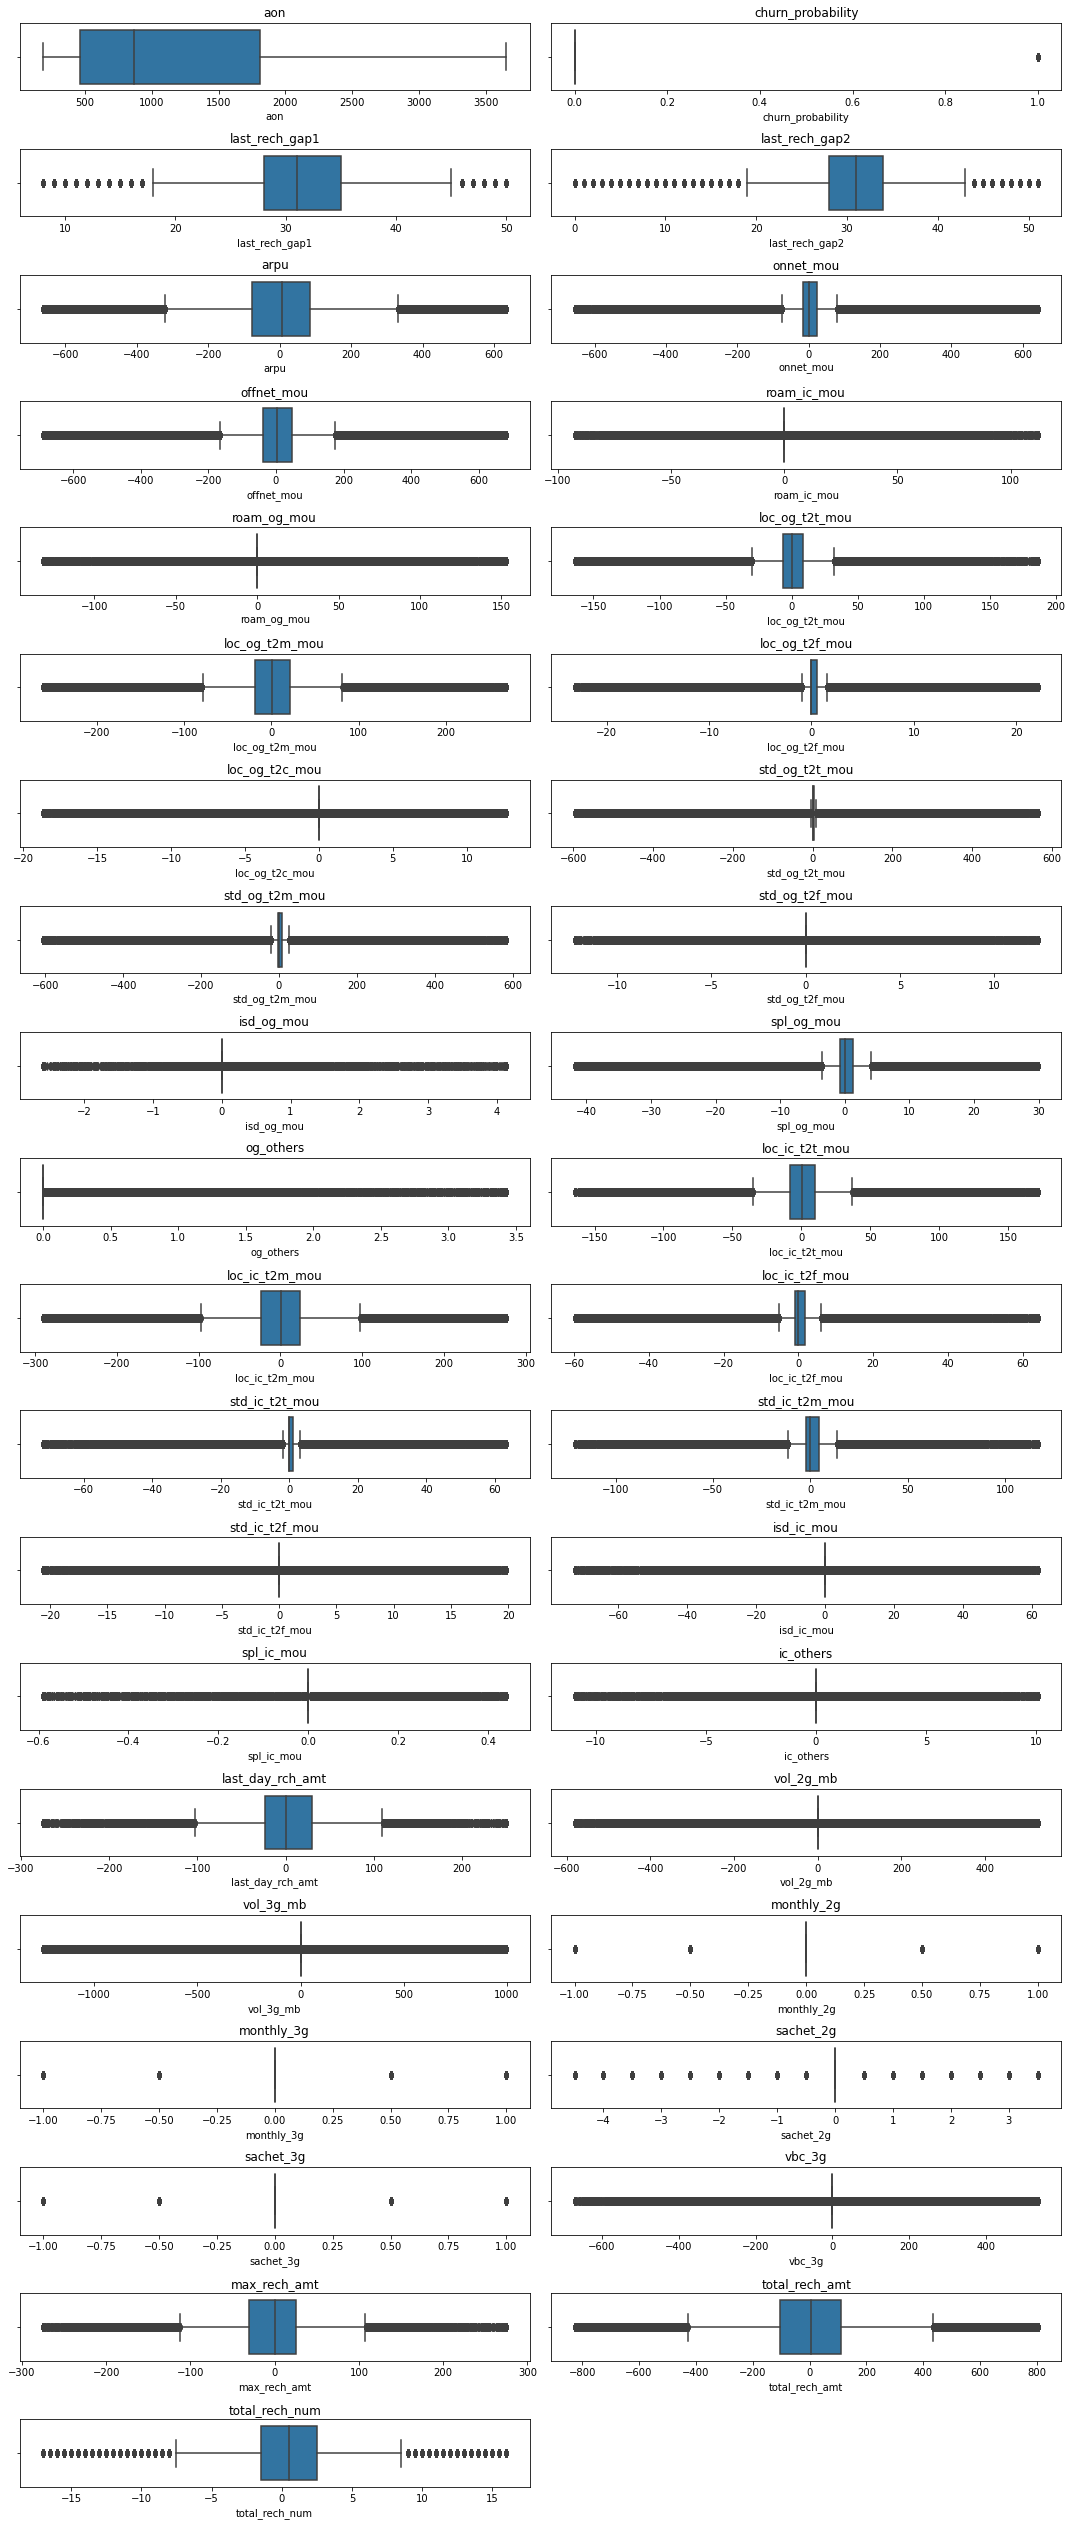

In [1986]:
# Rechecking for Outliers
a = 23
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 40)

for var in data:
    plt.subplot(a, b, c)
    plt.title(var)
    plt.xlabel(var)
    sns.boxplot(data[var])
    c = c + 1
    plt.tight_layout()
plt.show();

### Exploratory Data Analysis

#### 1. Checking for Class Imbalance

In [1987]:
sns.histplot(data['churn_probability'])

<AxesSubplot:xlabel='churn_probability', ylabel='Count'>

In [1988]:
sizes = data['churn_probability'].value_counts(sort = True)
colors = ["grey","purple"] 

plt.pie(sizes, labels = ['Non-Churn', 'Churn'],colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

Only 10.2% of the records have a Churn probability of 1. This is a case of Class Imbalance that needs to be dealt with during model building.

#### 2. Finding correlations between variables

<AxesSubplot:>

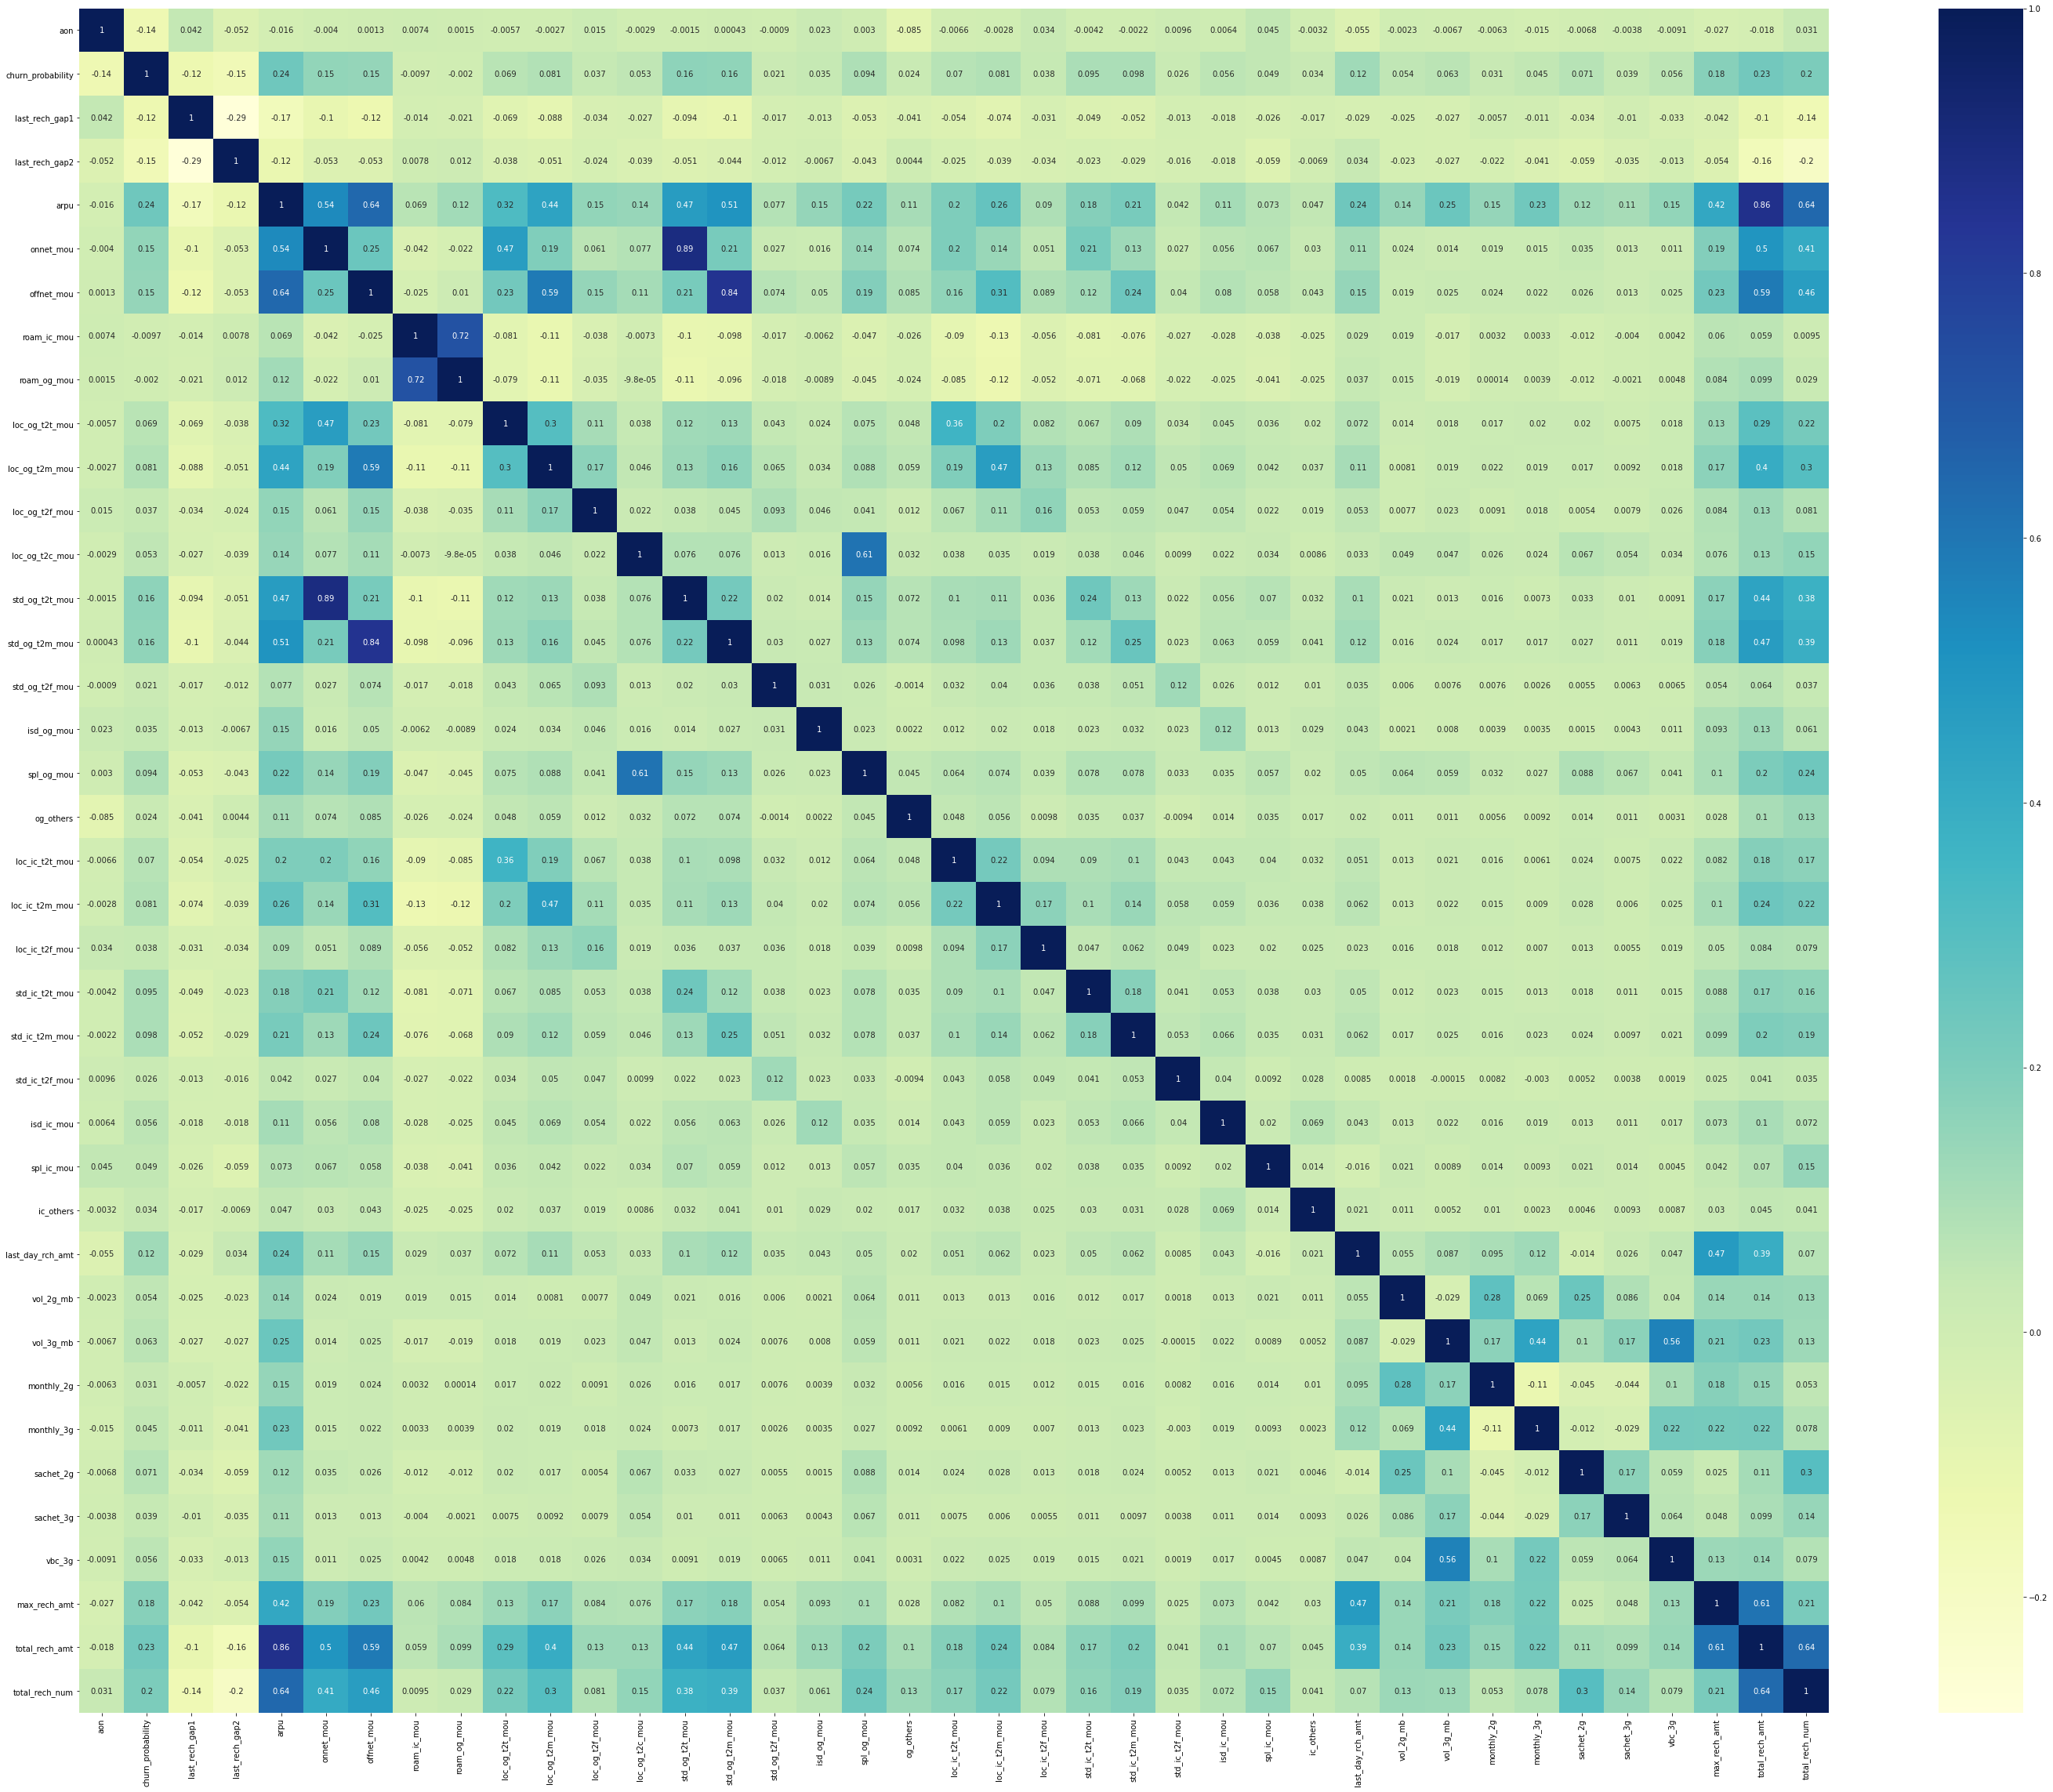

In [1989]:
plt.figure(figsize = (50,40))
sns.heatmap(data.corr(),annot= True, cmap = 'YlGnBu')

We can see some multi-collinearity among the variables.

In [1990]:
data.corr()['churn_probability'].sort_values(ascending = False)

churn_probability    1.000000
arpu                 0.240416
total_rech_amt       0.225966
total_rech_num       0.203795
max_rech_amt         0.179662
std_og_t2t_mou       0.163931
std_og_t2m_mou       0.159413
onnet_mou            0.154426
offnet_mou           0.148610
last_day_rch_amt     0.120961
std_ic_t2m_mou       0.098291
std_ic_t2t_mou       0.094758
spl_og_mou           0.093596
loc_og_t2m_mou       0.081057
loc_ic_t2m_mou       0.081032
sachet_2g            0.070907
loc_ic_t2t_mou       0.069922
loc_og_t2t_mou       0.068595
vol_3g_mb            0.062656
vbc_3g               0.056208
isd_ic_mou           0.055838
vol_2g_mb            0.054462
loc_og_t2c_mou       0.052980
spl_ic_mou           0.048798
monthly_3g           0.044768
sachet_3g            0.039165
loc_ic_t2f_mou       0.037928
loc_og_t2f_mou       0.036955
isd_og_mou           0.034568
ic_others            0.033582
monthly_2g           0.031430
std_ic_t2f_mou       0.026303
og_others            0.024337
std_og_t2f

### Data Splitting and Scaling

In [1991]:
X = data.drop(['churn_probability'],axis=1)
y = data['churn_probability']

In [1992]:
final_col = list(X.columns)

In [1993]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100,stratify=y)

In [1994]:
# Verifying the stratification
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

0.10187963019653462
0.1019047619047619


In [1995]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1996]:
X_train_scaled.shape

(48999, 38)

In [1997]:
X_test_scaled.shape

(21000, 38)

### Dimensionality Reduction using PCA

In [1998]:
pca = PCA(random_state=100)

In [1999]:
pca.fit(X_train_scaled)

PCA(random_state=100)

In [2000]:
pca.components_

array([[-5.60981222e-02, -1.19091637e-01, -7.51605023e-02, ...,
         2.48879031e-01,  4.38861557e-01,  3.43708764e-01],
       [ 9.90782843e-01,  4.31352165e-02, -5.91221424e-02, ...,
        -7.85291098e-04,  2.22050725e-02,  4.61011654e-02],
       [ 7.11575232e-02, -7.86420733e-01,  5.74706206e-01, ...,
        -1.01744874e-01, -8.74690011e-02, -3.02174411e-02],
       ...,
       [-8.41058354e-04, -2.62971740e-02,  1.95514558e-02, ...,
        -2.11731239e-01,  7.19258295e-01, -9.60905418e-02],
       [ 1.12234282e-03,  5.12523613e-03,  6.99328609e-03, ...,
        -2.51803862e-02,  4.61468197e-02, -1.96678560e-02],
       [-3.71690419e-04,  1.51664416e-03,  2.33062099e-03, ...,
        -6.96097071e-03,  1.22765990e-02, -3.77772140e-04]])

In [2001]:
pca.explained_variance_ratio_

array([0.15468187, 0.12378564, 0.05774486, 0.0508713 , 0.0420797 ,
       0.03985703, 0.03466783, 0.03323338, 0.03236297, 0.02914313,
       0.02760838, 0.02672564, 0.02557869, 0.02496698, 0.02197716,
       0.02083951, 0.0199464 , 0.01892302, 0.01785155, 0.01702559,
       0.01647293, 0.01541512, 0.01492078, 0.01459415, 0.01429207,
       0.01369162, 0.01358409, 0.0133625 , 0.01208166, 0.01102564,
       0.01046939, 0.00872373, 0.00678285, 0.00551407, 0.00447696,
       0.003442  , 0.00066545, 0.00061439])

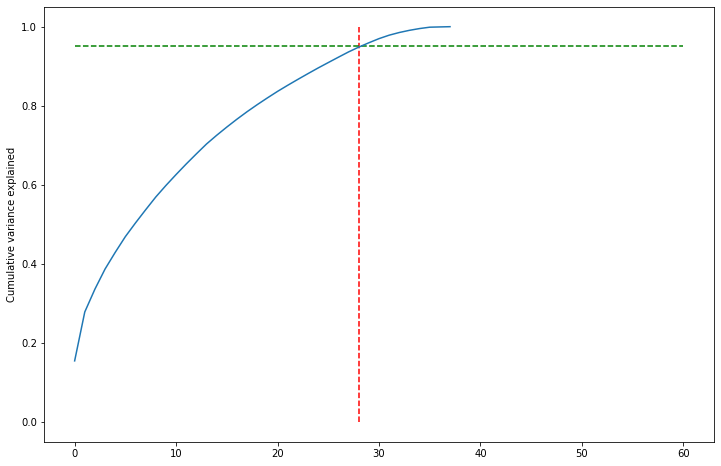

In [2002]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[12,8])
plt.vlines(x=28, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=60, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [2003]:
pca_final = IncrementalPCA(n_components=28)

In [2004]:
X_train_pca = pca_final.fit_transform(X_train_scaled)

In [2005]:
X_train_pca.shape

(48999, 28)

In [2006]:
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat

array([[ 1.00000000e+00,  1.16738549e-06,  4.07617194e-06,
         3.78534876e-07, -1.00682396e-06,  3.61545242e-07,
         1.11500208e-07,  1.78346444e-06, -4.82257083e-06,
        -4.17378675e-06,  4.55521866e-06, -9.59133732e-06,
        -2.06195585e-06, -2.29842824e-06, -8.45621750e-06,
        -4.42635942e-06,  4.61599778e-07,  9.36271911e-06,
        -2.22205155e-06, -1.40172652e-06, -1.11350470e-06,
         8.77774056e-06,  1.87290200e-05,  7.36379964e-07,
         4.39414461e-06,  1.33128474e-05,  2.17179067e-05,
         2.84806057e-05],
       [ 1.16738549e-06,  1.00000000e+00,  1.87210465e-06,
         4.67499898e-06,  4.23677709e-06, -2.82880996e-06,
         1.32572419e-05, -6.12571074e-06,  2.27754358e-06,
         1.87841763e-06,  2.15859709e-06, -1.28785432e-05,
         4.66584021e-06,  8.38145575e-06, -2.09847216e-05,
        -1.82775977e-05, -6.09037250e-06, -1.52764045e-05,
        -1.52479144e-05,  1.67022872e-07,  1.38986691e-05,
         1.03033989e-05, -8.87

In [2007]:
corrmat.shape

(28, 28)

<AxesSubplot:>

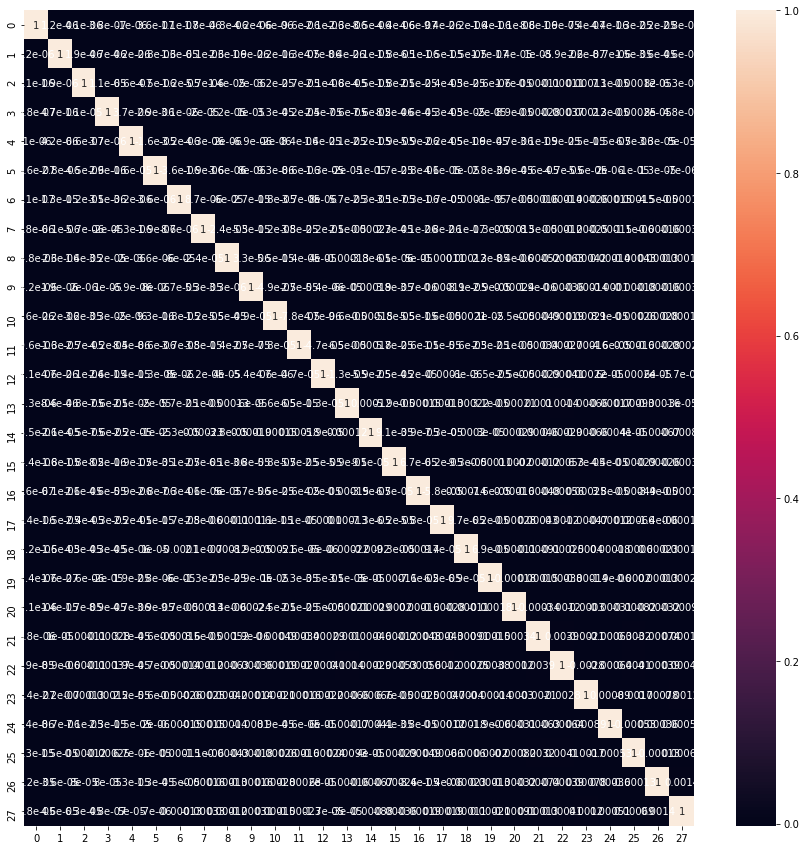

In [2008]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [2549]:
X_test_pca = pca_final.transform(X_test_scaled)
X_test_pca.shape

(21000, 28)

### Model Building and Evaluation

#### Model 1 : Using Logistic Regression

In [2550]:
log = LogisticRegression(class_weight = 'balanced')

In [2551]:
log_model = log.fit(X_train_pca, y_train)

In [2552]:
y_train_pred_prob1 = log_model.predict_proba(X_train_pca)
y_train_pred_prob1

array([[0.50308889, 0.49691111],
       [0.6403905 , 0.3596095 ],
       [0.50935375, 0.49064625],
       ...,
       [0.8065835 , 0.1934165 ],
       [0.54410192, 0.45589808],
       [0.69811634, 0.30188366]])

In [2553]:
y_train_pred1 = log_model.predict(X_train_pca)
y_train_pred1

array([0., 0., 0., ..., 0., 0., 0.])

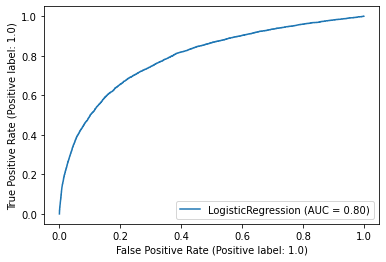

In [2554]:
metrics.plot_roc_curve(estimator = log, X = X_train_pca, y = y_train, drop_intermediate=False)
plt.show()

In [2555]:
y_test_pred_prob1  = log_model.predict_proba(X_test_pca)

In [2556]:
y_test_pred1 = log_model.predict(X_test_pca)

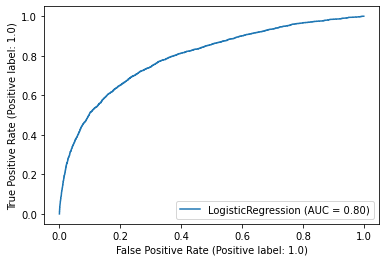

In [2557]:
metrics.plot_roc_curve(estimator = log, X = X_test_pca, y = y_test, drop_intermediate=False)
plt.show()

In [2558]:
# Function to calculate various metrics
def eval_metrics(actual,pred):
    confusion = metrics.confusion_matrix(actual,pred)
    print(confusion)
    disp = metrics.ConfusionMatrixDisplay(confusion)
    disp.plot()
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print (f'Accuracy: {round(metrics.accuracy_score(actual,pred)*100,2)}')
    print (f'Recall: {round(TP * 100 / float(TP+FN),2)}')
    print (f'Precision: {round(TP * 100 / float(TP+FP),2)}')


In [2559]:
eval_metrics(y_train,y_train_pred1)

[[32246 11761]
 [ 1393  3599]]
Accuracy: 73.15
Recall: 72.1
Precision: 23.43


[[13838  5022]
 [  595  1545]]
Accuracy: 73.25
Recall: 72.2
Precision: 23.53


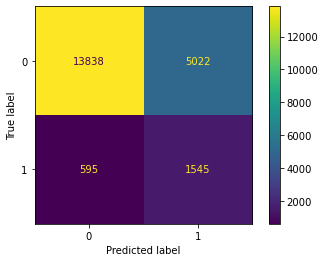

In [2560]:
eval_metrics(y_test,y_test_pred1)

#### Model 2 : Using Decision Tree

In [2561]:
dt = DecisionTreeClassifier(random_state=100, class_weight="balanced")

In [2562]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [2563]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [2564]:
%%time
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Wall time: 1min 11s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [2565]:
score_dt = pd.DataFrame(grid_search.cv_results_)
score_dt.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.466564      0.009739         0.003133        0.006265   
1       0.466627      0.009760         0.004840        0.005728   
2       0.478986      0.020407         0.006947        0.008145   
3       0.491520      0.025033         0.005770        0.005479   
4       0.521358      0.034478         0.002732        0.002247   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.736837   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.736837   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.736837   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.736837   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.736837   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.700714           0.699796            0.70102           0.692316   
1           0.700714           0.699796            0.70102           0.692316   
2           0.700714           0.699796            0.70102           0.692316   
3           0.700714           0.699796            0.70102           0.692316   
4           0.700714           0.699796            0.70102           0.692316   

   mean_test_score  std_test_score  rank_test_score  
0         0.706137         0.01568               36  
1         0.706137         0.01568               36  
2         0.706137         0.01568               36  
3         0.706137         0.01568               36  
4         0.706137         0.01568               36

In [2566]:
score_dt.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
45       4.661090      0.067360         0.006383        0.007820   
20       2.710502      0.095649         0.010529        0.008851   
46       4.482971      0.135378         0.006383        0.007820   
21       2.656372      0.138784         0.001083        0.002165   
47       4.310391      0.085838         0.003125        0.006250   

   param_criterion param_max_depth param_min_samples_leaf  \
45         entropy              20                      5   
20            gini              20                      5   
46         entropy              20                     10   
21            gini              20                     10   
47         entropy              20                     20   

                                               params  split0_test_score  \
45  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.827347   
20  {'criterion': 'gini', 'max_depth': 20, 'min_sa...           0.815816   
46  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.817143   
21  {'criterion': 'gini', 'max_depth': 20, 'min_sa...           0.812959   
47  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.790816   

    split1_test_score  split2_test_score  split3_test_score  \
45           0.822449           0.819796           0.826531   
20           0.818673           0.822245           0.806020   
46           0.813571           0.813571           0.818878   
21           0.818571           0.811735           0.799490   
47           0.787245           0.779286           0.785918   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
45           0.824064         0.824037        0.002745                1  
20           0.817941         0.816139        0.005467                2  
46           0.809572         0.814547        0.003229                3  
21           0.809879         0.810527        0.006234                4  
47           0.779671         0.784587        0.004470                5

In [2567]:
grid_search.best_score_

0.8240372257893871

In [2568]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, min_samples_leaf=5, random_state=100)

In [2569]:
y_train_pred2 = dt_best.predict(X_train_pca)
y_test_pred2 = dt_best.predict(X_test_pca)

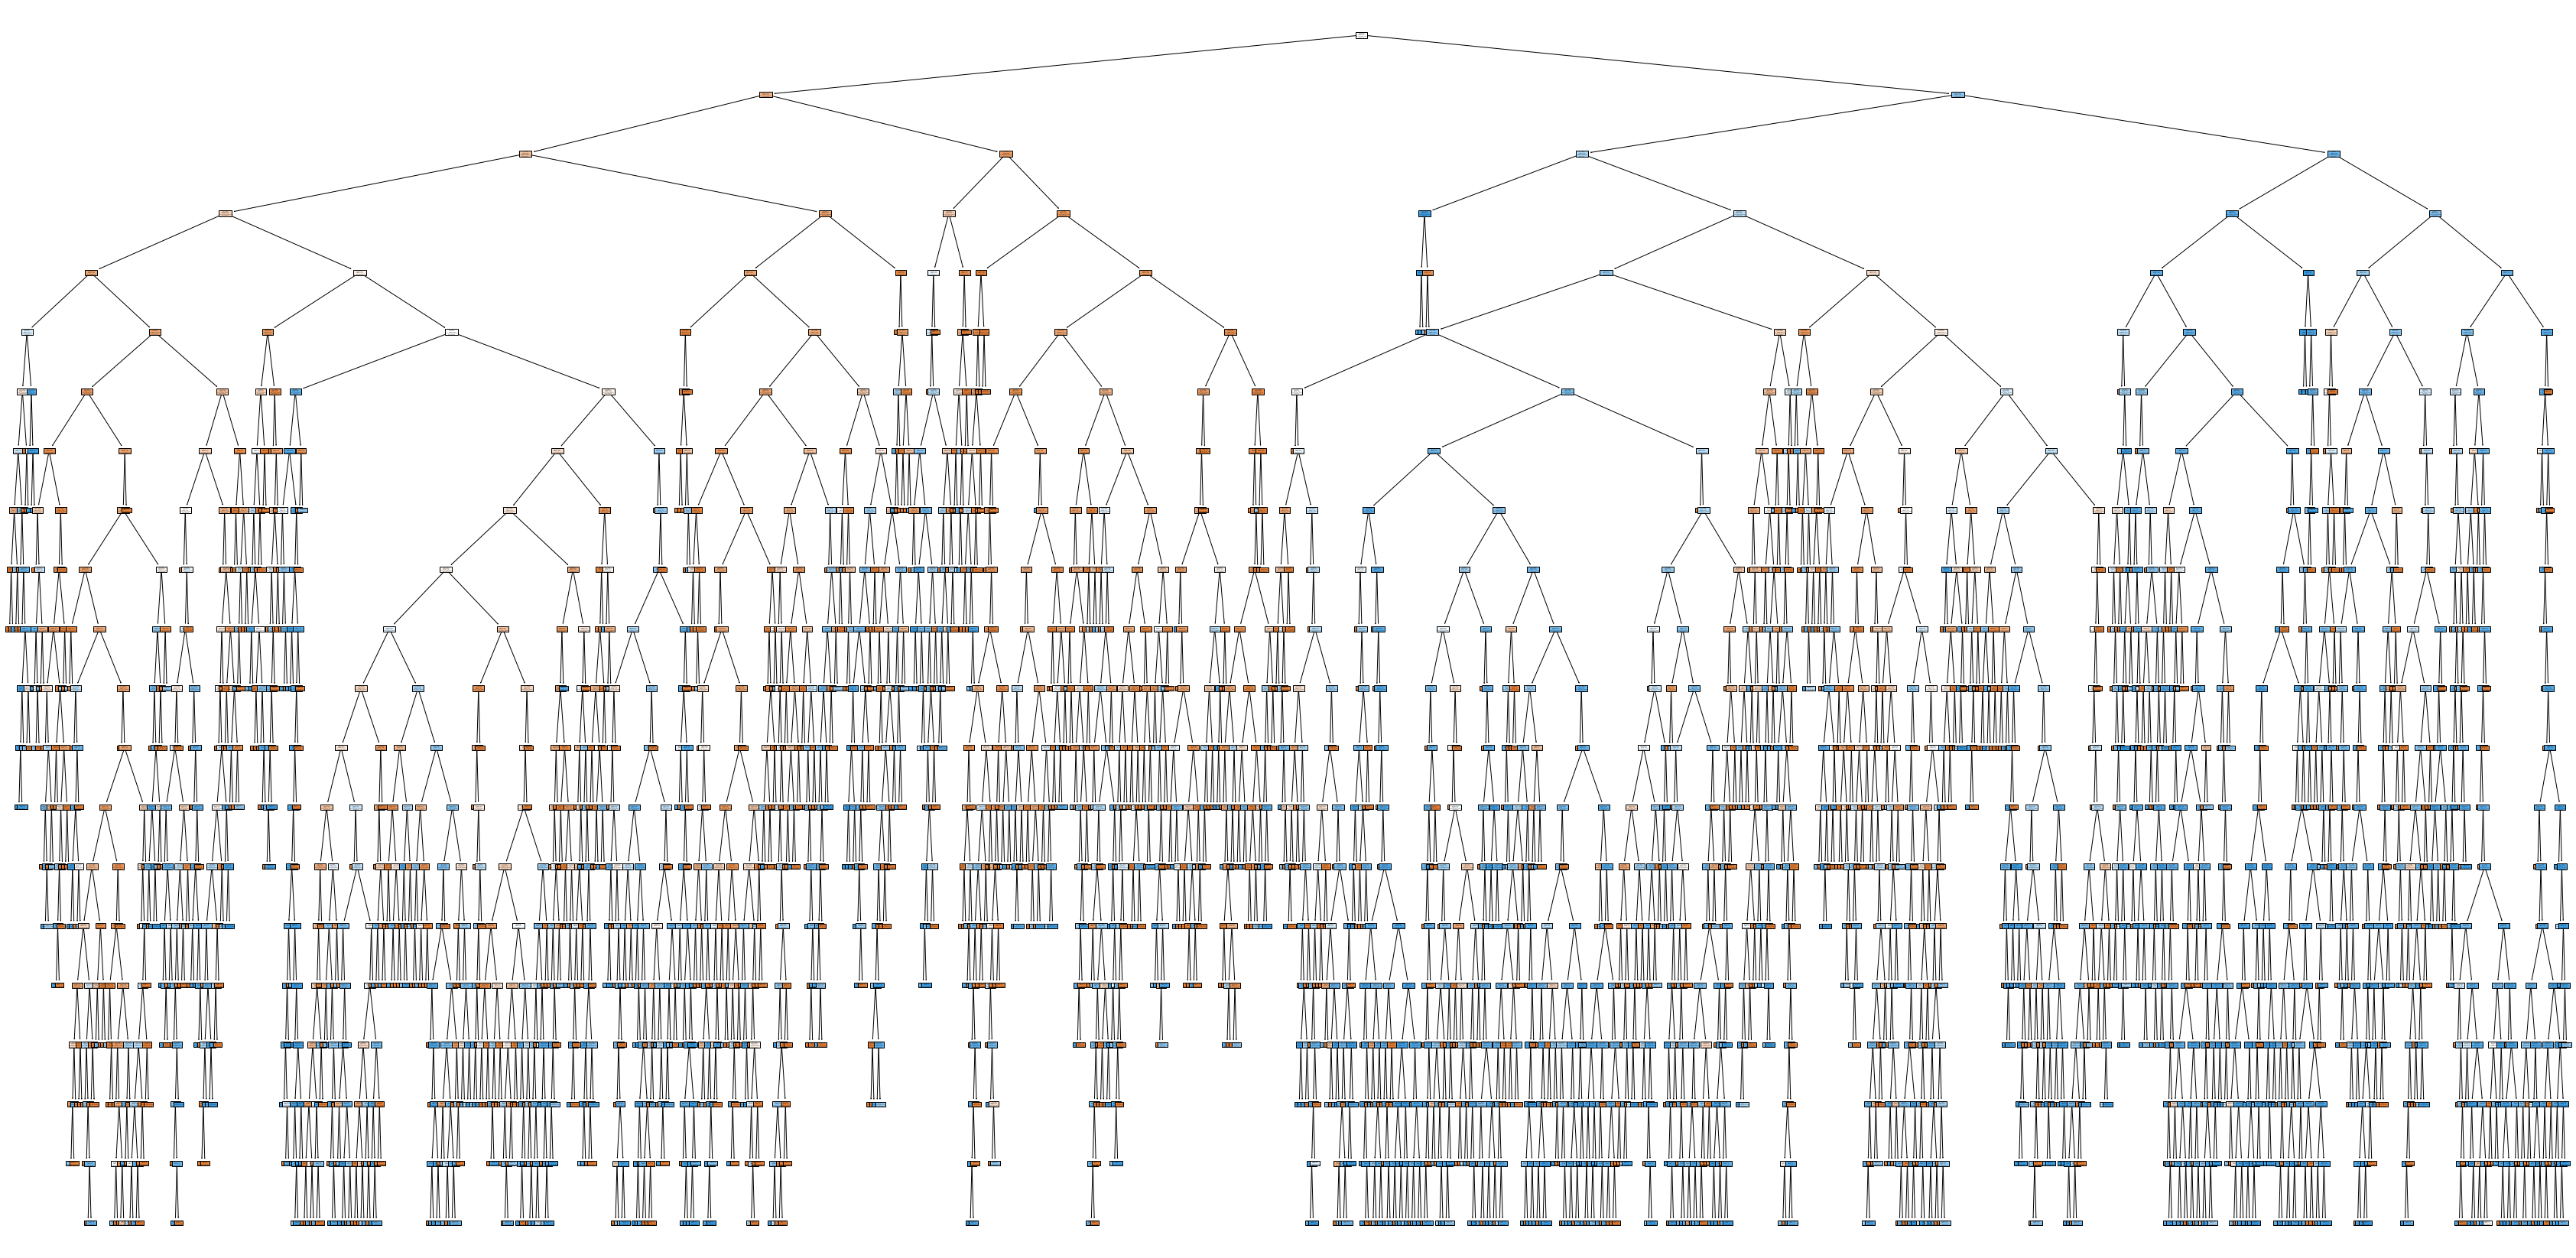

In [2570]:
plt.figure(figsize=(60,30))
plot_tree(dt_best, feature_names = pd.DataFrame(X_train_pca).columns,class_names=['No Churn', "Churn"],filled=True);

[[39646  4361]
 [    5  4987]]
Accuracy: 91.09
Recall: 99.9
Precision: 53.35


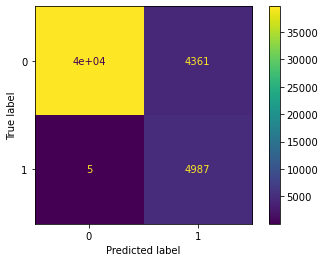

In [2571]:
eval_metrics(y_train,y_train_pred2)

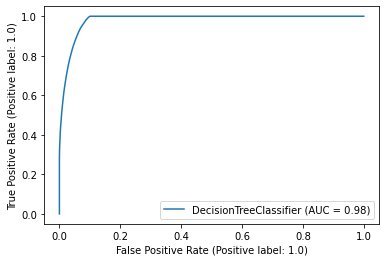

In [2572]:
metrics.plot_roc_curve(estimator = dt_best, X = X_train_pca, y = y_train, drop_intermediate=False)
plt.show()

[[15993  2867]
 [  936  1204]]
Accuracy: 81.89
Recall: 56.26
Precision: 29.58


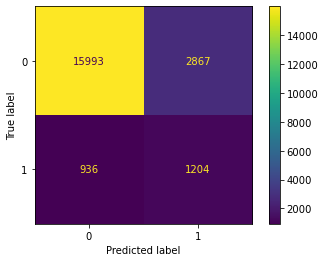

In [2573]:
eval_metrics(y_test,y_test_pred2)

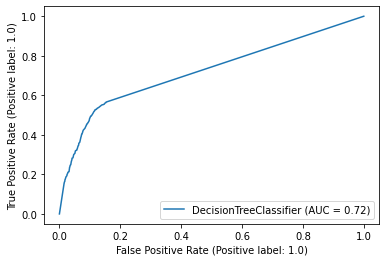

In [2574]:
metrics.plot_roc_curve(estimator = dt_best, X = X_test_pca, y = y_test, drop_intermediate=False)
plt.show()

#### Model 3 : Using Random Forest

In [2575]:
rf = RandomForestClassifier(random_state=100, class_weight="balanced_subsample")

In [2576]:
params = {
    'max_depth': [3,4,5,10,15],
    'min_samples_leaf': [10,20,50],
    'n_estimators': [125,150,175]
}

In [2577]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [2578]:
%%time
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Wall time: 16min 41s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 10, 15],
                         'min_samples_leaf': [10, 20, 50],
                         'n_estimators': [125, 150, 175]},
             scoring='accuracy', verbose=1)

In [2579]:
grid_search.best_score_

0.887814050163386

In [2580]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced_subsample', max_depth=15,
                       min_samples_leaf=10, n_estimators=175, random_state=100)

In [2581]:
y_train_pred3 = rf_best.predict(X_train_pca)
y_test_pred3 = rf_best.predict(X_test_pca)

[[40875  3132]
 [  538  4454]]
Accuracy: 92.51
Recall: 89.22
Precision: 58.71


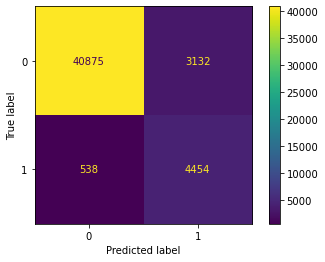

In [2582]:
eval_metrics(y_train,y_train_pred3)

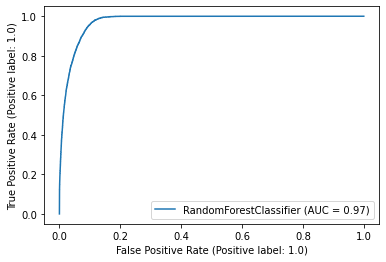

In [2583]:
metrics.plot_roc_curve(estimator = rf_best, X = X_train_pca, y = y_train, drop_intermediate=False)
plt.show()

[[17236  1624]
 [  814  1326]]
Accuracy: 88.39
Recall: 61.96
Precision: 44.95


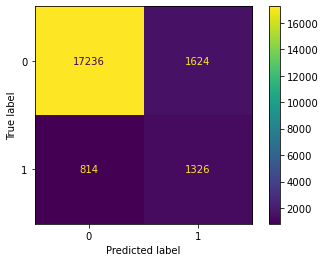

In [2584]:
eval_metrics(y_test,y_test_pred3)

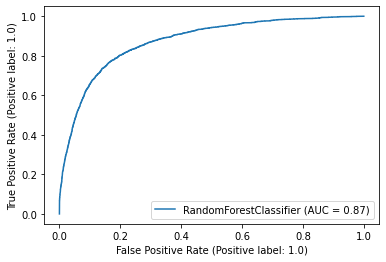

In [2585]:
metrics.plot_roc_curve(estimator = rf_best, X = X_test_pca, y = y_test, drop_intermediate=False)
plt.show()

#### Model 4 : Using XGBoost

In [2936]:
import xgboost as xgb

In [2937]:
xgb = xgb.XGBClassifier(objective = 'binary:logistic',random_state = 100,scale_pos_weight = 9)

In [2938]:
xgb.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=100, ...)

In [2939]:
y_train_pred4 = xgb.predict(X_train_pca)
y_test_pred4 = xgb.predict(X_test_pca)

[[40512  3495]
 [  121  4871]]
Accuracy: 92.62
Recall: 97.58
Precision: 58.22


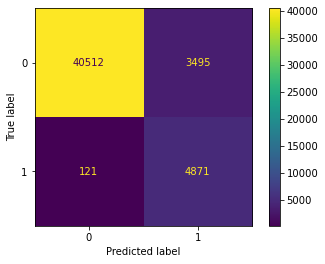

In [2940]:
eval_metrics(y_train,y_train_pred4)

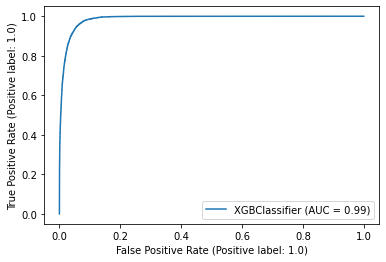

In [2941]:
metrics.plot_roc_curve(estimator = xgb, X = X_train_pca, y = y_train, drop_intermediate=False)
plt.show()

[[16831  2029]
 [  710  1430]]
Accuracy: 86.96
Recall: 66.82
Precision: 41.34


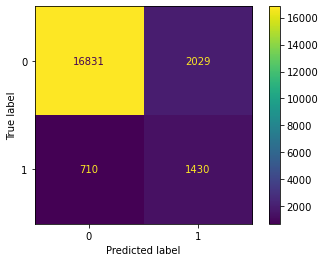

In [2942]:
eval_metrics(y_test,y_test_pred4)

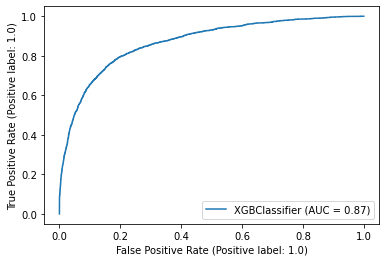

In [2943]:
metrics.plot_roc_curve(estimator = xgb, X = X_test_pca, y = y_test, drop_intermediate=False)
plt.show()

#### Model 5 : Using XGBoost with hyper parameter tuning

In [2830]:
xgb = xgb.XGBClassifier(objective = 'binary:logistic',random_state = 100)

In [2832]:
# A parameter grid for XGBoost
params = {
        'n_estimators' : [ 175,200], # no of trees 
        'learning_rate' : [ 0.05],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.5, 1],
        'max_depth': [6],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1,3,5,7]
                    }

grid_search = GridSearchCV(xgb, param_grid=params, cv = 3, scoring='accuracy', n_jobs=-1, verbose=3)


In [2833]:
%%time
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Wall time: 1h 14min 37s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                         

In [2834]:
grid_search.best_score_

0.9166513602318415

In [2843]:
xgb_best = grid_search.best_estimator_
xgb_best

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=100, ...)

In [2836]:
y_train_pred5 = xgb_best.predict(X_train_pca)
y_test_pred5 = xgb_best.predict(X_test_pca)

[[43752   255]
 [ 2964  2028]]
Accuracy: 93.43
Recall: 40.62
Precision: 88.83


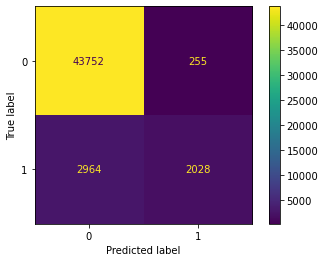

In [2837]:
eval_metrics(y_train,y_train_pred5)

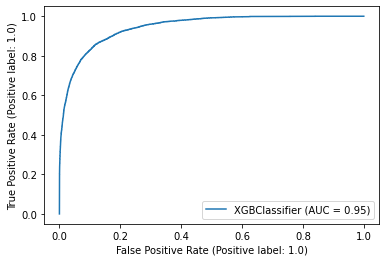

In [2838]:
metrics.plot_roc_curve(estimator = xgb_best, X = X_train_pca, y = y_train, drop_intermediate=False)
plt.show()


[[18653   207]
 [ 1560   580]]
Accuracy: 91.59
Recall: 27.1
Precision: 73.7


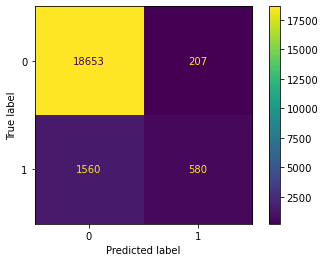

In [2839]:
eval_metrics(y_test,y_test_pred5)


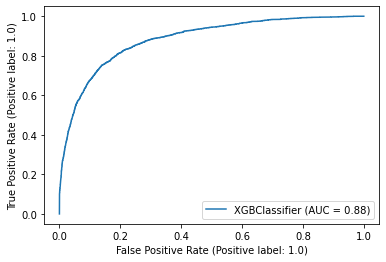

In [2840]:
metrics.plot_roc_curve(estimator = xgb_best, X = X_test_pca, y = y_test, drop_intermediate=False)
plt.show()

#### Model 6 : Using XGBoost without PCA

[[41010  2997]
 [  638  4354]]
Accuracy: 92.58
Recall: 87.22
Precision: 59.23


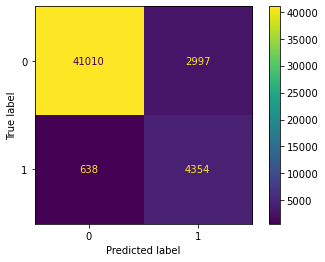

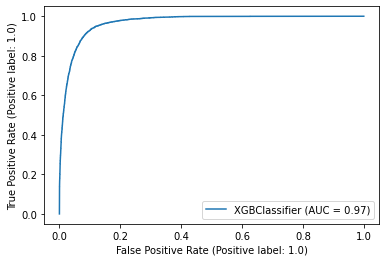

[[17543  1317]
 [  488  1652]]
Accuracy: 91.4
Recall: 77.2
Precision: 55.64


In [2915]:
import xgboost as xgb

xgb1 = xgb.XGBClassifier(objective = 'binary:logistic',random_state = 100,scale_pos_weight = 5,max_depth = 6,
                        colsample_bytree = 0.6, n_estimators = 200,gamma = 1,learning_rate = 0.05)


xgb1.fit(X_train_scaled, y_train)

y_train_pred6 = xgb1.predict(X_train_scaled)
y_test_pred6 = xgb1.predict(X_test_scaled)

eval_metrics(y_train,y_train_pred6)

metrics.plot_roc_curve(estimator = xgb1, X = X_train_scaled, y = y_train, drop_intermediate=False)
plt.show()

eval_metrics(y_test,y_test_pred6)

metrics.plot_roc_curve(estimator = xgb1, X = X_test_scaled, y = y_test, drop_intermediate=False)
plt.show()

#### Model 7 : Using Random Forest without PCA

In [2500]:
rf = RandomForestClassifier(random_state=100, class_weight="balanced_subsample")

params = {
    'max_depth': [10,15,20],
    'min_samples_leaf': [5,10,15],
    'n_estimators': [150,175,200],
    'max_features': ['log2', 'auto'],
    'max_samples': [0.1,0.3,0.5]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [2501]:
%%time
grid_search.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 162 candidates, totalling 648 fits
Wall time: 18min 30s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': ['log2', 'auto'],
                         'max_samples': [0.1, 0.3, 0.5],
                         'min_samples_leaf': [5, 10, 15],
                         'n_estimators': [150, 175, 200]},
             scoring='accuracy', verbose=1)

In [2502]:
grid_search.best_score_

0.9248556266983894

In [2503]:
rf_best1 = grid_search.best_estimator_
rf_best1

RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       max_features='log2', max_samples=0.1, min_samples_leaf=5,
                       n_estimators=200, random_state=100)

[[42135  1872]
 [ 1633  3359]]
Accuracy: 92.85
Recall: 67.29
Precision: 64.21


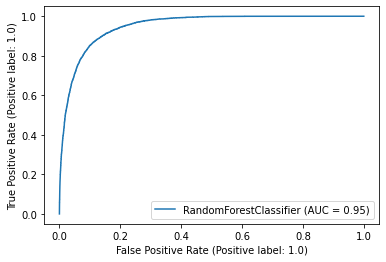

[[18064   796]
 [  764  1376]]
Accuracy: 92.57
Recall: 64.3
Precision: 63.35


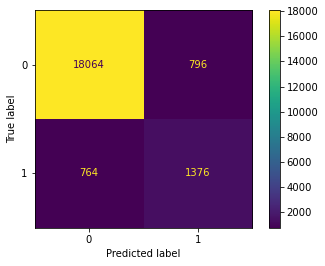

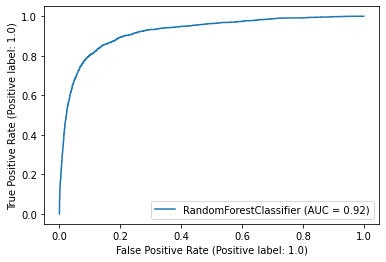

In [2595]:
y_train_pred7 = rf_best1.predict(X_train_scaled)
y_test_pred7 = rf_best1.predict(X_test_scaled)

eval_metrics(y_train,y_train_pred7)

metrics.plot_roc_curve(estimator = rf_best1, X = X_train_scaled, y = y_train, drop_intermediate=False)
plt.show()

eval_metrics(y_test,y_test_pred7)

metrics.plot_roc_curve(estimator = rf_best1, X = X_test_scaled, y = y_test, drop_intermediate=False)
plt.show()

#### Model 8 : Using RFE with Logistic regression followed by Random Forest

In [2602]:
rfe = RFE(estimator = LogisticRegression(class_weight = 'balanced'))

In [2604]:
model_cv = GridSearchCV(rfe,cv=5,verbose=1,param_grid = {'n_features_to_select': list(range(10,31,5))},return_train_score=True,scoring= 'accuracy')

In [2605]:
model_cv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=RFE(estimator=LogisticRegression(class_weight='balanced')),
             param_grid={'n_features_to_select': [10, 15, 20, 25, 30]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [2607]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.202062      0.558302         0.005104        0.006509   
1       6.347405      0.263552         0.006238        0.007640   
2       5.242312      0.272920         0.009479        0.007742   
3       3.999796      0.260867         0.003124        0.006249   
4       2.596698      0.103119         0.006259        0.007666   

  param_n_features_to_select                        params  split0_test_score  \
0                         10  {'n_features_to_select': 10}           0.735510   
1                         15  {'n_features_to_select': 15}           0.741735   
2                         20  {'n_features_to_select': 20}           0.745306   
3                         25  {'n_features_to_select': 25}           0.746429   
4                         30  {'n_features_to_select': 30}           0.745816   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.727551           0.732755           0.740204           0.730177   
1           0.739184           0.740408           0.744082           0.739769   
2           0.741837           0.741633           0.746531           0.739055   
3           0.742347           0.742449           0.750204           0.737932   
4           0.743367           0.742653           0.748367           0.736504   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.733239        0.004373                5            0.732927   
1         0.741036        0.001743                4            0.740274   
2         0.742872        0.002701                3            0.741524   
3         0.743872        0.004154                1            0.742672   
4         0.743342        0.003965                2            0.743539   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.732340            0.732952            0.735248   
1            0.737621            0.739917            0.743437   
2            0.741167            0.742672            0.745708   
3            0.741779            0.744050            0.746601   
4            0.741550            0.743948            0.746728   

   split4_train_score  mean_train_score  std_train_score  
0            0.732168          0.733127         0.001105  
1            0.741327          0.740515         0.001897  
2            0.742092          0.742633         0.001620  
3            0.743699          0.743760         0.001629  
4            0.743699          0.743893         0.001655

In [2608]:
rfe_best = model_cv.best_estimator_
rfe_best

RFE(estimator=LogisticRegression(class_weight='balanced'),
    n_features_to_select=25)

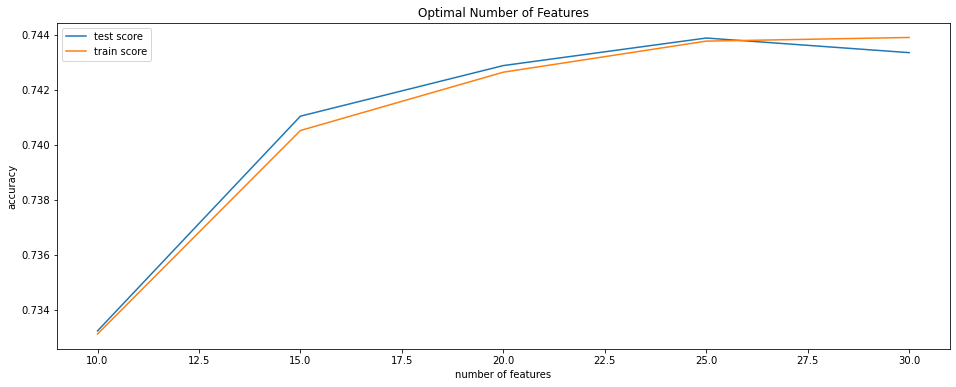

In [2622]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('accuracy')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [2629]:
rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe_best.support_,rfe_best.ranking_))).sort_values(by = 2)
rfe_df

0      1   2
0                aon   True   1
35      max_rech_amt   True   1
34            vbc_3g   True   1
32         sachet_2g   True   1
27  last_day_rch_amt   True   1
25        spl_ic_mou   True   1
24        isd_ic_mou   True   1
23    std_ic_t2f_mou   True   1
22    std_ic_t2m_mou   True   1
21    std_ic_t2t_mou   True   1
19    loc_ic_t2m_mou   True   1
36    total_rech_amt   True   1
17         og_others   True   1
16        spl_og_mou   True   1
18    loc_ic_t2t_mou   True   1
37    total_rech_num   True   1
13    std_og_t2m_mou   True   1
12    std_og_t2t_mou   True   1
1     last_rech_gap1   True   1
2     last_rech_gap2   True   1
3               arpu   True   1
9     loc_og_t2m_mou   True   1
8     loc_og_t2t_mou   True   1
4          onnet_mou   True   1
5         offnet_mou   True   1
26         ic_others  False   2
7        roam_og_mou  False   3
15        isd_og_mou  False   4
28         vol_2g_mb  False   5
20    loc_ic_t2f_mou  False   6
11    loc_og_t2c_mou  False   7
29         vol_3g_mb  False   8
31        monthly_3g  False   9
30        monthly_2g  False  10
14    std_og_t2f_mou  False  11
33         sachet_3g  False  12
10    loc_og_t2f_mou  False  13
6        roam_ic_mou  False  14

In [2631]:
list(rfe_df[0])

['aon',
 'max_rech_amt',
 'vbc_3g',
 'sachet_2g',
 'last_day_rch_amt',
 'spl_ic_mou',
 'isd_ic_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'total_rech_amt',
 'og_others',
 'spl_og_mou',
 'loc_ic_t2t_mou',
 'total_rech_num',
 'std_og_t2m_mou',
 'std_og_t2t_mou',
 'last_rech_gap1',
 'last_rech_gap2',
 'arpu',
 'loc_og_t2m_mou',
 'loc_og_t2t_mou',
 'onnet_mou',
 'offnet_mou',
 'ic_others',
 'roam_og_mou',
 'isd_og_mou',
 'vol_2g_mb',
 'loc_ic_t2f_mou',
 'loc_og_t2c_mou',
 'vol_3g_mb',
 'monthly_3g',
 'monthly_2g',
 'std_og_t2f_mou',
 'sachet_3g',
 'loc_og_t2f_mou',
 'roam_ic_mou']

In [2635]:
X_rfe = X_train.drop(['ic_others',
 'roam_og_mou',
 'isd_og_mou',
 'vol_2g_mb',
 'loc_ic_t2f_mou',
 'loc_og_t2c_mou',
 'vol_3g_mb',
 'monthly_3g',
 'monthly_2g',
 'std_og_t2f_mou',
 'sachet_3g',
 'loc_og_t2f_mou',
 'roam_ic_mou'],axis = 1)

In [2636]:
X_rfe.shape

(48999, 25)

In [2638]:
X_rfe_test = X_test.drop(['ic_others',
 'roam_og_mou',
 'isd_og_mou',
 'vol_2g_mb',
 'loc_ic_t2f_mou',
 'loc_og_t2c_mou',
 'vol_3g_mb',
 'monthly_3g',
 'monthly_2g',
 'std_og_t2f_mou',
 'sachet_3g',
 'loc_og_t2f_mou',
 'roam_ic_mou'],axis = 1)

In [2640]:
X_rfe_test.shape

(21000, 25)

In [2641]:
rf = RandomForestClassifier(random_state=100, class_weight="balanced_subsample")

params = {
    'max_depth': [10,15,20],
    'min_samples_leaf': [5,10,15],
    'n_estimators': [150,175,200],
    'max_features': ['log2', 'auto'],
    'max_samples': [0.1,0.3,0.5,1]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [2643]:
%%time
grid_search.fit(X_rfe, y_train)

Fitting 4 folds for each of 216 candidates, totalling 864 fits
Wall time: 17min 47s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': ['log2', 'auto'],
                         'max_samples': [0.1, 0.3, 0.5, 1],
                         'min_samples_leaf': [5, 10, 15],
                         'n_estimators': [150, 175, 200]},
             scoring='accuracy', verbose=1)

In [2644]:
grid_search.best_score_

0.9214269802949345

In [2645]:
rf_best2 = grid_search.best_estimator_
rf_best2

RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       max_samples=0.1, min_samples_leaf=5, n_estimators=200,
                       random_state=100)

In [2646]:
y_train_pred8 = rf_best2.predict(X_rfe)
y_test_pred8 = rf_best2.predict(X_rfe_test)


In [2647]:
eval_metrics(y_train,y_train_pred8)

metrics.plot_roc_curve(estimator = rf_best2, X = X_rfe, y = y_train, drop_intermediate=False)
plt.show()

[[42113  1894]
 [ 1789  3203]]
Accuracy: 92.48
Recall: 64.16
Precision: 62.84


[[18057   803]
 [  821  1319]]
Accuracy: 92.27
Recall: 61.64
Precision: 62.16


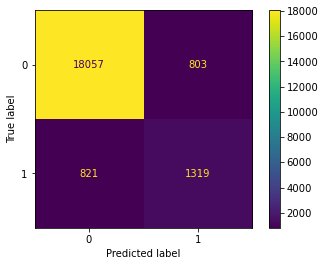

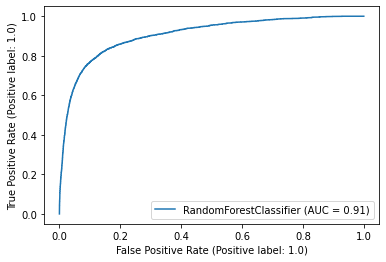

In [2648]:
eval_metrics(y_test,y_test_pred8)

metrics.plot_roc_curve(estimator = rf_best2, X = X_rfe_test, y = y_test, drop_intermediate=False)
plt.show()

#### Model 9 : Using RFE with Logistic regression followed by PCA and then Random Forest <br>(Building further from Model 8)

In [2675]:
X_rfe_scaled = scaler.fit_transform(X_rfe)
X_rfe_test_scaled = scaler.fit_transform(X_rfe_test)

In [2677]:
pca1 = PCA(random_state=100)
pca1.fit(X_rfe_scaled)

PCA(random_state=100)

In [2680]:
var_cumu = np.cumsum(pca1.explained_variance_ratio_)

fig = plt.figure(figsize=[12,8])
plt.vlines(x=18, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [2697]:
pca_final1 = IncrementalPCA(n_components=18)

(48999, 18)
[[ 1.00000000e+00 -2.04462470e-06  2.15589685e-06  8.91821195e-06
  -4.72119042e-06  2.53211158e-06 -9.16352970e-06 -1.23236305e-05
   8.08161892e-06 -2.69380207e-05 -1.46930811e-05 -4.69529973e-06
   5.43598238e-06 -2.64084383e-05  2.53986255e-05  1.74972224e-05
  -5.64387248e-05 -3.05135664e-05]
 [-2.04462470e-06  1.00000000e+00  9.36415106e-07 -9.82321627e-06
   8.08621904e-06  2.24071455e-07 -2.90315785e-06  7.45552158e-06
  -1.01729314e-05  7.04145300e-06 -7.23841718e-06  1.62687037e-06
  -2.67715680e-05 -6.04406812e-07 -3.16578413e-05 -9.79806782e-06
   2.40667529e-05  5.06093542e-05]
 [ 2.15589685e-06  9.36415106e-07  1.00000000e+00  8.27650825e-06
   1.22259881e-06  6.93899336e-06 -1.40988320e-05  9.08729276e-06
  -4.03176208e-05 -5.13628874e-05 -6.63164051e-05 -1.09631828e-05
  -9.89869358e-05  5.75807570e-07 -8.62835599e-06  7.86704242e-05
  -5.20072946e-05  3.37851686e-05]
 [ 8.91821195e-06 -9.82321627e-06  8.27650825e-06  1.00000000e+00
  -8.73150095e-05 -2.1156

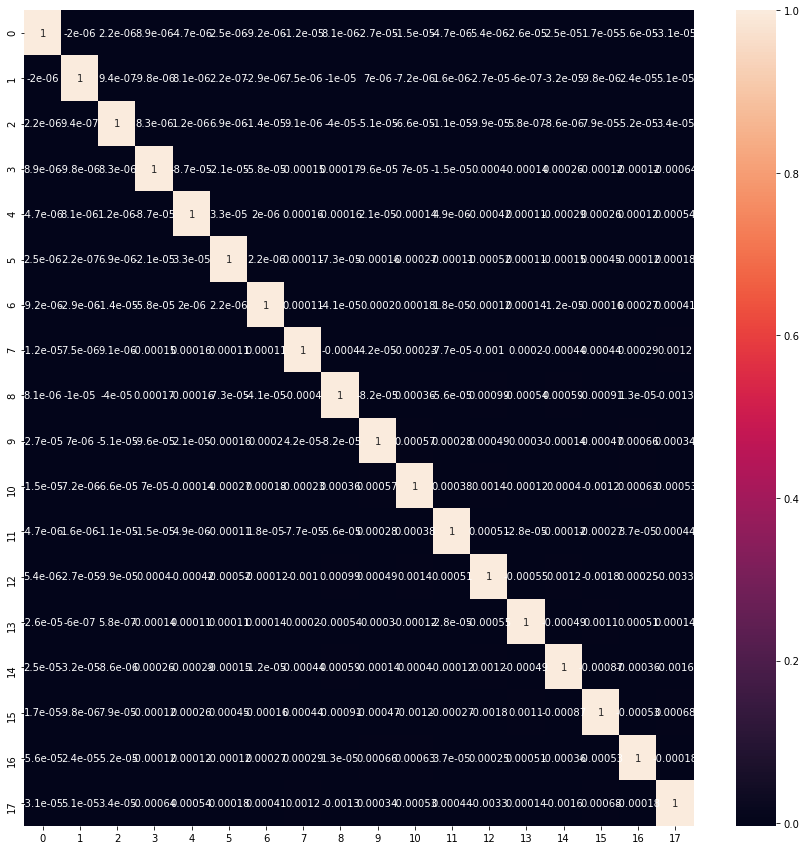

In [2698]:
X_rfe_pca = pca_final1.fit_transform(X_rfe_scaled)

print(X_rfe_pca.shape)

corrmat1 = np.corrcoef(X_rfe_pca.transpose())
print(corrmat1)
print(corrmat1.shape)

plt.figure(figsize=[15,15])
sns.heatmap(corrmat1, annot=True)

X_rfe_test_pca = pca_final1.transform(X_rfe_test_scaled)
print(X_rfe_test_pca.shape)

In [2699]:
rf = RandomForestClassifier(random_state=100, class_weight="balanced_subsample")

params = {
    'max_depth': [10,15,20],
    'min_samples_leaf': [5,10,15],
    'n_estimators': [150,175,200],
    'max_features': ['log2', 'auto'],
    'max_samples': [0.1,0.3,0.5,1]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [2700]:
grid_search.fit(X_rfe_pca,y_train)

Fitting 4 folds for each of 216 candidates, totalling 864 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': ['log2', 'auto'],
                         'max_samples': [0.1, 0.3, 0.5, 1],
                         'min_samples_leaf': [5, 10, 15],
                         'n_estimators': [150, 175, 200]},
             scoring='accuracy', verbose=1)

In [2701]:
grid_search.best_score_

0.9102022505793892

In [2702]:
rf_best3 = grid_search.best_estimator_
rf_best3

RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       max_features='log2', max_samples=0.3, min_samples_leaf=5,
                       n_estimators=150, random_state=100)

In [2703]:
y_train_pred9 = rf_best3.predict(X_rfe_pca)
y_test_pred9 = rf_best3.predict(X_rfe_test_pca)

[[42770  1237]
 [ 1865  3127]]
Accuracy: 93.67
Recall: 62.64
Precision: 71.65


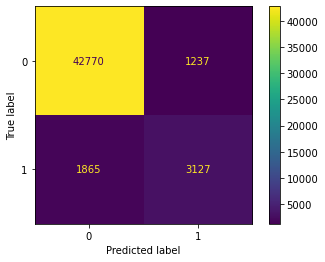

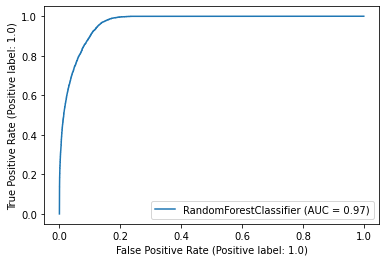

In [2704]:
eval_metrics(y_train,y_train_pred9)

metrics.plot_roc_curve(estimator = rf_best3, X = X_rfe_pca, y = y_train, drop_intermediate=False)
plt.show()

In [2705]:
eval_metrics(y_test,y_test_pred9)

metrics.plot_roc_curve(estimator = rf_best3, X = X_rfe_test_pca, y = y_test, drop_intermediate=False)
plt.show()

[[18133   727]
 [ 1245   895]]
Accuracy: 90.61
Recall: 41.82
Precision: 55.18


#### Model 10 : Using RFE with Logistic regression followed by PCA and then XG Boost<br> (Building further from Model 9)

In [2877]:
import xgboost as xgb

In [2875]:
xgb1 = xgb.XGBClassifier(objective = 'binary:logistic',random_state = 100,scale_pos_weight = 5)

In [2878]:
# A parameter grid for XGBoost
params = {
        'n_estimators' : [ 175,200], # no of trees 
        'learning_rate' : [ 0.05],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.5, 1],
        'max_depth': [6],
    'colsample_bytree': [0.6, 0.8, 1.0]
                        }
grid_search = GridSearchCV(xgb1, param_grid=params, cv = 3, scoring='accuracy', n_jobs=-1, verbose=3)

In [2879]:
%%time
grid_search.fit(X_rfe_pca, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Wall time: 12min 32s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [2882]:
xgb2 = grid_search.best_estimator_
xgb2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=100, ...)

In [2883]:
y_train_pred10 = xgb2.predict(X_rfe_pca)
y_test_pred10 = xgb2.predict(X_rfe_test_pca)

[[40401  3606]
 [ 1114  3878]]
Accuracy: 90.37
Recall: 77.68
Precision: 51.82


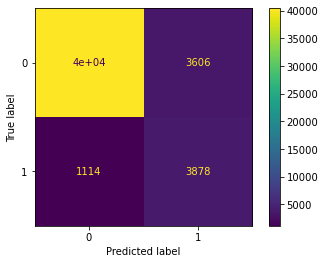

[[17099  1761]
 [  758  1382]]
Accuracy: 88.0
Recall: 64.58
Precision: 43.97


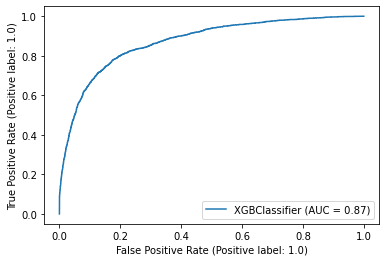

In [2884]:
eval_metrics(y_train,y_train_pred10)

metrics.plot_roc_curve(estimator = xgb2, X = X_rfe_pca, y = y_train, drop_intermediate=False)
plt.show()

eval_metrics(y_test,y_test_pred10)

metrics.plot_roc_curve(estimator = xgb2, X = X_rfe_test_pca, y = y_test, drop_intermediate=False)
plt.show()

### Making Predictions on Test data

In [2100]:
test_data = pd.read_csv("test.csv")

In [2101]:
test_data.shape

(30000, 171)

In [2102]:
test_data.drop(columns = ['circle_id', 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8','arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8','fb_user_6',
 'fb_user_7',
 'fb_user_8'], inplace = True)

In [2103]:
# Missing values in last_day_of_month columns replaced by mode value
test_data['last_date_of_month_7'].fillna(value = 7/31/2014,inplace=True)
test_data['last_date_of_month_8'].fillna(value = 8/31/2014,inplace=True)

In [2104]:
# Missing values in last_day_of_rech columns replaced by last_day_of_month
test_data['date_of_last_rech_6'].fillna(value = last_date_6,inplace=True)
test_data['date_of_last_rech_7'].fillna(value = last_date_7,inplace=True)
test_data['date_of_last_rech_8'].fillna(value = last_date_8,inplace=True)

In [2105]:
test_num_col = test_data.select_dtypes(include = ['float64','int64'])
for var in test_num_col.columns:
    if round(((test_data[var].isnull().sum()/len(test_data))* 100),2) < 6.00:
        test_data[var].fillna(value = data_median[var],inplace =True)

In [2106]:
# Removing columns with all 0's
test_data.drop (columns = ['loc_og_t2o_mou','std_og_t2o_mou',
 'loc_ic_t2o_mou','std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8','std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8'], axis=1, inplace =True)

# Saving ids for later use and dropping the id column
test_id = pd.Series(test_data['id'])
test_data.drop(columns = ['id'], axis =1, inplace =True)

In [2107]:
test_data['last_rech_gap1'] = pd.to_datetime(test_data['date_of_last_rech_7']) - pd.to_datetime(test_data['date_of_last_rech_6'])
test_data['last_rech_gap2'] = pd.to_datetime(test_data['date_of_last_rech_8']) - pd.to_datetime(test_data['date_of_last_rech_7'])

test_data['last_rech_gap1'] = (test_data['last_rech_gap1'].astype('str'))
test_data['last_rech_gap1'] = test_data['last_rech_gap1'].apply(lambda x : x[0:2])
test_data['last_rech_gap1'] = pd.to_numeric(test_data['last_rech_gap1'])

test_data['last_rech_gap2'] = (test_data['last_rech_gap2'].astype('str'))
test_data['last_rech_gap2'] = test_data['last_rech_gap2'].apply(lambda x : x[0:2])
test_data['last_rech_gap2'] = pd.to_numeric(test_data['last_rech_gap2'])


In [2108]:
# Removing date_of_last_rech and last_day_of_month columns
test_data.drop(columns = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8'],axis = 1, inplace =True)

test_data.reset_index(drop = True, inplace = True)

In [2109]:
test_data['arpu'] = (test_data['arpu_6'] + test_data['arpu_7'])/2 - test_data[ 'arpu_8']
test_data['onnet_mou'] = (test_data['onnet_mou_6'] + test_data['onnet_mou_7'])/2 - test_data[ 'onnet_mou_8']
test_data['offnet_mou'] = (test_data['offnet_mou_6']+test_data['offnet_mou_7'])/2 - test_data['offnet_mou_8']
test_data['roam_ic_mou'] = (test_data['roam_ic_mou_6']+test_data['roam_ic_mou_7'])/2 - test_data['roam_ic_mou_8']
test_data['roam_og_mou'] = (test_data['roam_og_mou_6']+test_data['roam_og_mou_7'])/2 - test_data['roam_og_mou_8']
test_data['loc_og_t2t_mou'] = (test_data['loc_og_t2t_mou_6'] + test_data['loc_og_t2t_mou_7'])/2 - test_data['loc_og_t2t_mou_8']
test_data['loc_og_t2m_mou'] = (test_data['loc_og_t2m_mou_6'] + test_data['loc_og_t2m_mou_7'])/2 - test_data['loc_og_t2m_mou_8']
test_data['loc_og_t2f_mou'] = (test_data['loc_og_t2f_mou_6'] + test_data['loc_og_t2f_mou_7'])/2 - test_data['loc_og_t2f_mou_8']
test_data['loc_og_t2c_mou'] = (test_data['loc_og_t2c_mou_6'] + test_data['loc_og_t2c_mou_7'])/2 - test_data['loc_og_t2c_mou_8']
#test_data['loc_og_mou'] = (test_data['loc_og_mou_6'] + test_data['loc_og_mou_7'])/2 - test_data['loc_og_mou_8']
test_data['std_og_t2t_mou'] = (test_data['std_og_t2t_mou_6'] + test_data['std_og_t2t_mou_7'])/2 - test_data['std_og_t2t_mou_8']
test_data['std_og_t2m_mou'] = (test_data['std_og_t2m_mou_6'] + test_data['std_og_t2m_mou_7'])/2 - test_data['std_og_t2m_mou_8']
test_data['std_og_t2f_mou'] = (test_data['std_og_t2f_mou_6'] + test_data['std_og_t2f_mou_7'])/2 - test_data['std_og_t2f_mou_8']
#test_data['std_og_mou'] = (test_data['std_og_mou_6'] + test_data['std_og_mou_7'])/2 - test_data['std_og_mou_8']
test_data['isd_og_mou'] = (test_data['isd_og_mou_6'] + test_data['isd_og_mou_7'])/2 - test_data['isd_og_mou_8']
test_data['spl_og_mou'] = (test_data['spl_og_mou_6'] + test_data['spl_og_mou_7'])/2 - test_data['spl_og_mou_8']
test_data['og_others'] = (test_data['og_others_6'] + test_data['og_others_7'])/2 - test_data['og_others_8']
#test_data['total_og_mou'] = (test_data['total_og_mou_6'] + test_data['total_og_mou_7'])/2 - test_data['total_og_mou_8']
test_data['loc_ic_t2t_mou'] = (test_data['loc_ic_t2t_mou_6'] + test_data['loc_ic_t2t_mou_7'])/2 - test_data['loc_ic_t2t_mou_8']
test_data['loc_ic_t2m_mou'] = (test_data['loc_ic_t2m_mou_6'] + test_data['loc_ic_t2m_mou_7'])/2 - test_data['loc_ic_t2m_mou_8']
test_data['loc_ic_t2f_mou'] = (test_data['loc_ic_t2f_mou_6'] + test_data['loc_ic_t2f_mou_7'])/2 - test_data['loc_ic_t2f_mou_8']
#test_data['loc_ic_mou'] = (test_data['loc_ic_mou_6'] + test_data['loc_ic_mou_7'])/2 - test_data['loc_ic_mou_8']
test_data['std_ic_t2t_mou'] = (test_data['std_ic_t2t_mou_6'] + test_data['std_ic_t2t_mou_7'])/2 - test_data['std_ic_t2t_mou_8']
test_data['std_ic_t2m_mou'] = (test_data['std_ic_t2m_mou_6'] + test_data['std_ic_t2m_mou_7'])/2 - test_data['std_ic_t2m_mou_8']
test_data['std_ic_t2f_mou'] = (test_data['std_ic_t2f_mou_6'] + test_data['std_ic_t2f_mou_7'])/2 - test_data['std_ic_t2f_mou_8']
#test_data['std_ic_mou'] = (test_data['std_ic_mou_6'] + test_data['std_ic_mou_7'])/2 - test_data['std_ic_mou_8']
test_data['isd_ic_mou'] = (test_data['isd_ic_mou_6'] + test_data['isd_ic_mou_7'])/2 - test_data['isd_ic_mou_8']
test_data['spl_ic_mou'] = (test_data['spl_ic_mou_6'] + test_data['spl_ic_mou_7'])/2 - test_data['spl_ic_mou_8']
test_data['ic_others'] = (test_data['ic_others_6'] + test_data['ic_others_7'])/2 - test_data['ic_others_8']
#test_data['total_ic_mou'] = (test_data['total_ic_mou_6'] + test_data['total_ic_mou_7'])/2 - test_data['total_ic_mou_8']
test_data['last_day_rch_amt'] = (test_data['last_day_rch_amt_6'] + test_data['last_day_rch_amt_7'])/2 - test_data['last_day_rch_amt_8']
test_data['vol_2g_mb'] = (test_data['vol_2g_mb_6']+test_data['vol_2g_mb_7'])/2 -test_data['vol_2g_mb_8']
test_data['vol_3g_mb'] = (test_data['vol_3g_mb_6']+test_data['vol_3g_mb_7'])/2 -test_data['vol_3g_mb_8']
test_data['monthly_2g'] = (test_data['monthly_2g_6']+test_data['monthly_2g_7'])/2 -test_data['monthly_2g_8']
test_data['monthly_3g'] = (test_data['monthly_3g_6']+test_data['monthly_3g_7'])/2 -test_data['monthly_3g_8']
test_data['sachet_2g'] = (test_data['sachet_2g_6']+test_data['sachet_2g_7'])/2 -test_data['sachet_2g_8']
test_data['sachet_3g'] = (test_data['sachet_3g_6']+test_data['sachet_3g_7'])/2 -test_data['sachet_3g_8']
test_data['vbc_3g'] = (test_data['jun_vbc_3g']+test_data['jul_vbc_3g'])/2 - test_data['aug_vbc_3g']
test_data['max_rech_amt'] = (test_data['max_rech_amt_6'] + test_data['max_rech_amt_7'])/2 - test_data['max_rech_amt_8']
test_data['total_rech_amt'] = (test_data['total_rech_amt_6'] + test_data['total_rech_amt_7'])/2 - test_data['total_rech_amt_8']
test_data['total_rech_num'] = (test_data['total_rech_num_6'] + test_data['total_rech_num_7'])/2 - test_data['total_rech_num_8']


# Dropping the original columns and the columns relating to total mou values, as we are considering their individual components
test_data.drop(columns = ['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8','aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g'], axis=1, inplace =True)

In [2110]:
test_data.shape

(30000, 38)

In [2111]:
# Treating the outliers
for var in test_data.columns:
    test_data[var] = np.where(test_data[var]<Q1[var],Q1[var],test_data[var]) 
    test_data[var] = np.where(test_data[var]>Q3[var],Q3[var],test_data[var])

In [2112]:
test_data.shape

(30000, 38)

In [2113]:
test_data_scaled = scaler.transform(test_data)

In [2114]:
test_data_pca = pca_final.transform(test_data_scaled)
test_data_pca.shape

(30000, 28)

In [2944]:
prediction = rf_best1.predict(test_data_scaled)
prediction

array([0., 0., 1., ..., 0., 1., 0.])

In [2945]:
prediction.shape

(30000,)

In [2946]:
pred_df = pd.DataFrame(prediction.reshape(-1,1))
pred_df

0
0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
...    ...
29995  0.0
29996  0.0
29997  0.0
29998  1.0
29999  0.0

[30000 rows x 1 columns]

In [2947]:
pred_df.shape

(30000, 1)

In [2948]:
final_pred_df = pd.concat([test_id,pred_df],axis = 1)
final_pred_df

id    0
0      69999  0.0
1      70000  0.0
2      70001  1.0
3      70002  0.0
4      70003  0.0
...      ...  ...
29995  99994  0.0
29996  99995  0.0
29997  99996  0.0
29998  99997  1.0
29999  99998  0.0

[30000 rows x 2 columns]

In [2949]:
final_pred_df.rename(columns={0: "churn_probability"},inplace =True)
final_pred_df

id  churn_probability
0      69999                0.0
1      70000                0.0
2      70001                1.0
3      70002                0.0
4      70003                0.0
...      ...                ...
29995  99994                0.0
29996  99995                0.0
29997  99996                0.0
29998  99997                1.0
29999  99998                0.0

[30000 rows x 2 columns]

In [2950]:
final_pred_df['churn_probability'] = final_pred_df['churn_probability'].astype('int64')

In [2951]:
final_pred_df.set_index('id',inplace=True)

In [2952]:
final_pred_df

churn_probability
id                      
69999                  0
70000                  0
70001                  1
70002                  0
70003                  0
...                  ...
99994                  0
99995                  0
99996                  0
99997                  1
99998                  0

[30000 rows x 1 columns]

In [2953]:
final_pred_df.to_csv('submission.csv')

### Model Building to get Important features

In [2409]:
# Using the best parameters for random forest as obtained through grid search in Model 7
rf = RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       max_features='log2', max_samples=0.1, min_samples_leaf=5,
                       n_estimators=200, random_state=100)

In [2954]:
%%time
feat_best = rf.fit(X_train_scaled, y_train)

Wall time: 18.1 s


In [2955]:
y_train_pred = feat_best.predict(X_train_scaled)
y_test_pred = feat_best.predict(X_test_scaled)

[[44007     0]
 [    2  4990]]
Accuracy: 100.0
Recall: 99.96
Precision: 100.0


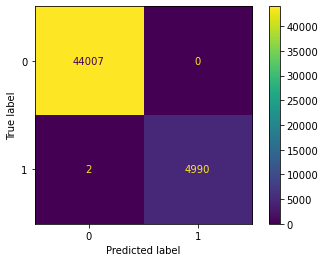

In [2956]:
eval_metrics(y_train,y_train_pred)


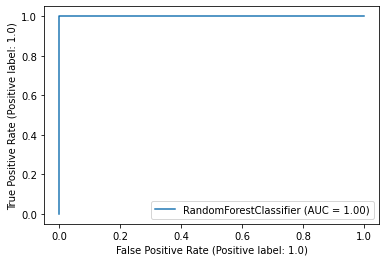

In [2957]:
metrics.plot_roc_curve(estimator = feat_best, X = X_train_scaled, y = y_train, drop_intermediate=False)
plt.show()


[[18564   296]
 [ 1145   995]]
Accuracy: 93.14
Recall: 46.5
Precision: 77.07


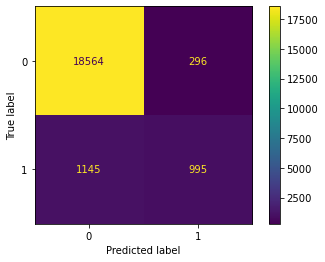

In [2958]:
eval_metrics(y_test,y_test_pred)

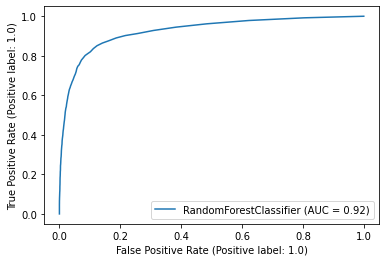

In [2959]:
metrics.plot_roc_curve(estimator = feat_best, X = X_test_scaled, y = y_test, drop_intermediate=False)
plt.show()

In [2960]:
feat_best.feature_importances_

array([0.03116554, 0.02364746, 0.03790687, 0.08371108, 0.01996343,
       0.02077616, 0.0355951 , 0.04366269, 0.0324713 , 0.03187195,
       0.03683401, 0.01017714, 0.02436231, 0.03056487, 0.0060872 ,
       0.00463279, 0.03685784, 0.00479791, 0.0328733 , 0.03192844,
       0.05151894, 0.02677538, 0.03155281, 0.02065671, 0.00979565,
       0.01801804, 0.01759992, 0.06167958, 0.01259368, 0.00775547,
       0.0023609 , 0.0022079 , 0.00580799, 0.00207633, 0.00710823,
       0.07219049, 0.0484214 , 0.02199318])

In [2961]:
feat_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": feat_best.feature_importances_
})

feat_df.sort_values(by="Imp", ascending=False)

Varname       Imp
3               arpu  0.083711
35      max_rech_amt  0.072190
27  last_day_rch_amt  0.061680
20    loc_ic_t2f_mou  0.051519
36    total_rech_amt  0.048421
7        roam_og_mou  0.043663
2     last_rech_gap2  0.037907
16        spl_og_mou  0.036858
10    loc_og_t2f_mou  0.036834
6        roam_ic_mou  0.035595
18    loc_ic_t2t_mou  0.032873
8     loc_og_t2t_mou  0.032471
19    loc_ic_t2m_mou  0.031928
9     loc_og_t2m_mou  0.031872
22    std_ic_t2m_mou  0.031553
0                aon  0.031166
13    std_og_t2m_mou  0.030565
21    std_ic_t2t_mou  0.026775
12    std_og_t2t_mou  0.024362
1     last_rech_gap1  0.023647
37    total_rech_num  0.021993
5         offnet_mou  0.020776
23    std_ic_t2f_mou  0.020657
4          onnet_mou  0.019963
25        spl_ic_mou  0.018018
26         ic_others  0.017600
28         vol_2g_mb  0.012594
11    loc_og_t2c_mou  0.010177
24        isd_ic_mou  0.009796
29         vol_3g_mb  0.007755
34            vbc_3g  0.007108
14    std_og_t2f_mou  0.006087
32         sachet_2g  0.005808
17         og_others  0.004798
15        isd_og_mou  0.004633
30        monthly_2g  0.002361
31        monthly_3g  0.002208
33         sachet_3g  0.002076

### Recommendations

#### Primary Objective:<br>
#### Best accuracy score of 92.6% on test.csv was obtained from Model 7 (Using Random Forest without PCA)

On training set:<br>
Accuracy: 92.85% <br>
Recall: 67.29% <br>
Precision: 64.21% <br>
AUC-ROC score: 0.95

On test set:<br>
Accuracy: 92.57% <br>
Recall: 64.3%<br>
Precision: 63.35%<br>
AUC-ROC score: 0.92

Model 7 is also the most balanced for precision and recall scores.

#### Other Objectives:

#### 1. Maximum churn cases to be predicted as churn and not as non-churn so that likely-to-churn customers are targeted
False Negatives are to be minimized i.e.the recall score must be maximized.<br>
This is obtained from Model 6.<br>
Maximum recall score is 77.2%

#### 2. Maximum cases predicted as churn should actually be churn and not non-churn predicted as churn so that marketing expense is not wasted on not-likely-to churn customers
False Positives are to be minimized i.e.the precision score must be maximized.<br>
This is obtained from Model 7.<br>
Maximum precision score is 64.21%

#### Top 5 important features:

1. arpu	
2. max_rech_amt<br>
3. last_day_rch_amt<br>
4. loc_ic_t2f_mou<br>
5. total_rech_amt

All features are calculated as follows: (Average of first two months values - Third month value)